In [23]:
import country_converter as coco
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
np.set_printoptions(precision=5)

In [24]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
font = {'family':'Helvetica, Ariel',
        'weight':'normal',
        'size':12}
plt.rc('font', **font)
sns.set(rc={"figure.dpi": 300, 'savefig.dpi': 300})
sns.set_context('notebook')
sns.set_style("ticks")
sns.set_palette("Accent")
FIG_FONT = dict(family="Helvetica, Ariel", weight="bold", color="#7f7f7f")

In [25]:
salaries = pd.read_csv("ds_salaries.csv")
salaries.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [26]:
#df.index.name = 'foo'
salaries.index.name = "Index"

In [27]:
salaries.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
Index,,,,,,,,,,,,
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [28]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [29]:
salaries.drop(labels=["salary", 'salary_currency'], axis=1, inplace=True)


In [30]:
salaries.rename(columns={"salary_in_usd": "salary"}, inplace=True)

In [31]:
salaries.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
Index,,,,,,,,,,
0,0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [32]:
salaries.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [33]:
def univariate_multi_plot(df=salaries, x=None, xlabel=None, explode=None):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.countplot(data=df, x=x, ax=ax[0], order=df[x].value_counts(ascending=True).index)
    df[x].value_counts(ascending=True).plot(kind="pie", autopct="%1.1f%%", ax=ax[1], explode=explode)
    sns.despine(bottom=True, left=True)
    ax[0].set_xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    ax[0].set_ylabel(ylabel="")
    ax[1].set_ylabel(ylabel="")
    ax[0].bar_label(ax[0].containers[0], label_type='edge', size=12, padding=1, fontname="Helvetica, Ariel", 
                    color="#7f7f7f")
    fig.text(0.5, 1, f'{xlabel} Distribution', size=16, fontdict=FIG_FONT, ha="center", va="center")
    plt.show()
    
def univariate_single_plot(df=salaries, x=None, xlabel=None, rotation=None, bar_label=False):
    fig, ax = plt.subplots(1, 1, figsize=(20, 7))
    sns.countplot(data=df, x=x, order=df[x].value_counts(ascending=True).index)
    sns.despine(bottom=True, left=True)
    plt.xlabel(xlabel=xlabel, size=14, fontdict=FIG_FONT)
    plt.xticks(rotation=rotation)
    plt.ylabel(ylabel="")
    if bar_label:
        ax.bar_label(ax.containers[0], label_type='edge', size=10, padding=1, fontname="Helvetica, Ariel", 
                        color="#7f7f7f")
    plt.title(label=f'{xlabel} Distribution', size=18, fontdict=FIG_FONT)
    plt.show()
    

def univariate_numerical_plot(df=salaries, x=None, xlabel=None, bar_label=True):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.histplot(data=df, x=x, kde=True, ax=ax[0])
    sns.boxplot(data=df, x=x, ax=ax[1])
    sns.despine(bottom=True, left=True)
    ax[0].set_xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    ax[1].set_xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    ax[0].set_ylabel(ylabel="")
    ax[1].set_ylabel(ylabel="")
    fig.text(0.5, 1, f'{xlabel} Distribution', size=16, fontdict=FIG_FONT, ha="center", va="center")
    plt.show()  
    

In [34]:
# for interpretability in graphs
salaries["experience_level"].replace(["EN", "MI", "SE", "EX"], ["Junior", "Mid", "Senior", "Expert"], inplace=True)
salaries["remote_ratio"].replace([0, 50, 100], ["On-site", "Hybrid", "Remote"], inplace=True)
salaries["employment_type"].replace(["PT", "FT", "CT", "FL"], ["Part-time", "Full-time", "Contract", "Freelance"], inplace=True)
salaries["company_size"].replace(["S", "M", "L"], ["Small", "Medium", "Large"], inplace=True)

findfont: Font family ['Helvetica, Ariel'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica, Ariel'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica, Ariel'] not found. Falling back to DejaVu Sans.


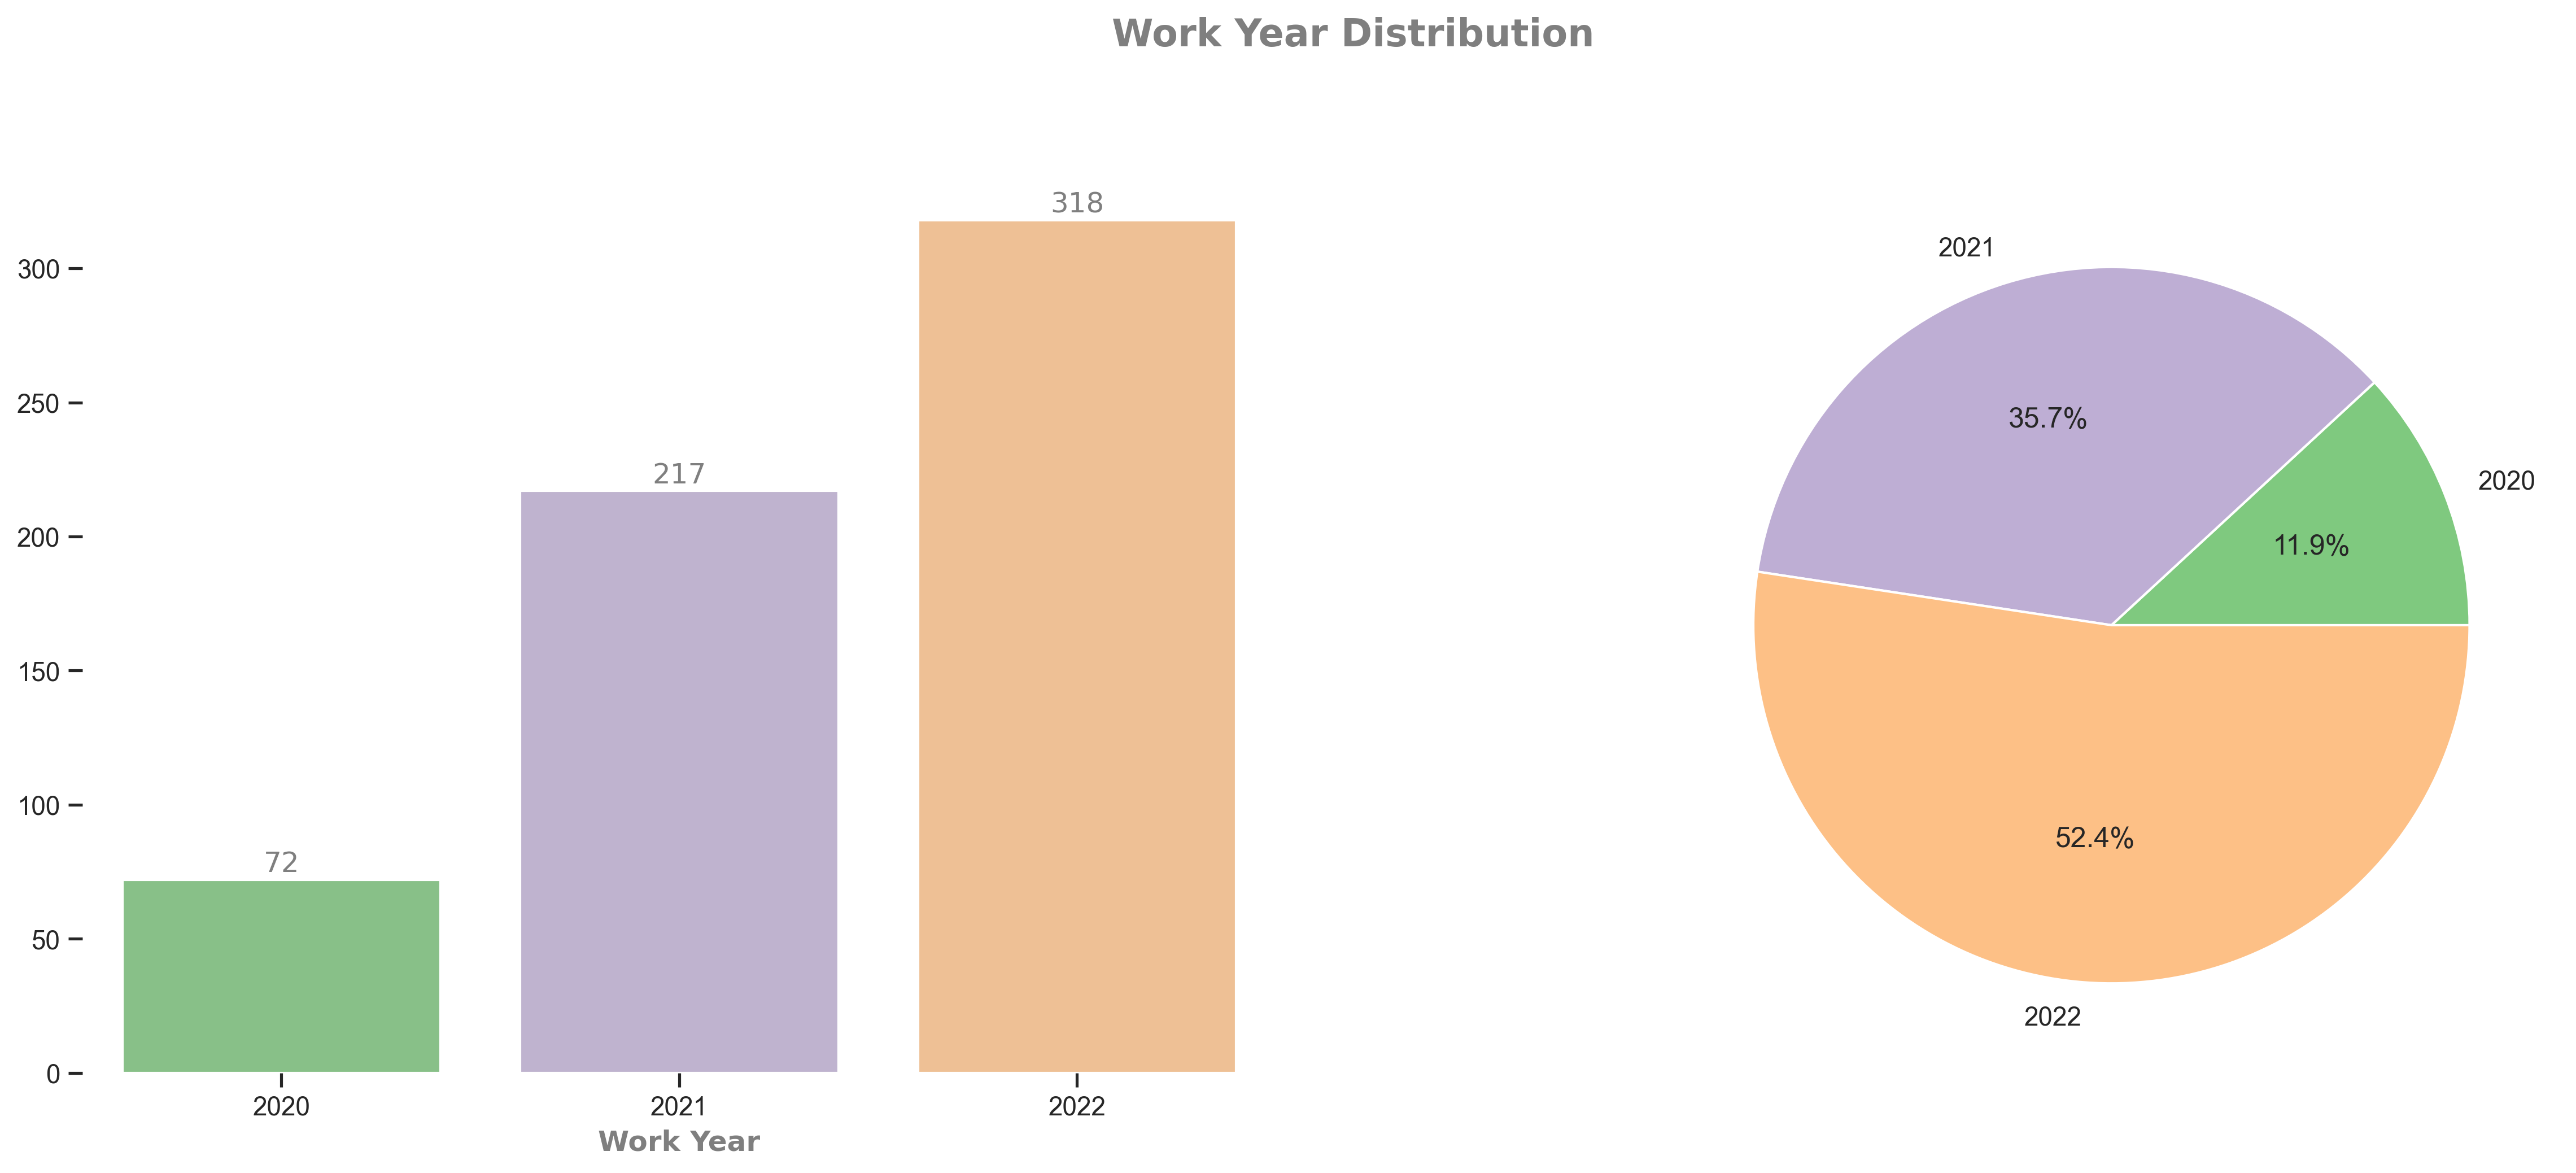

In [35]:
# work year
univariate_multi_plot(x="work_year", xlabel="Work Year")

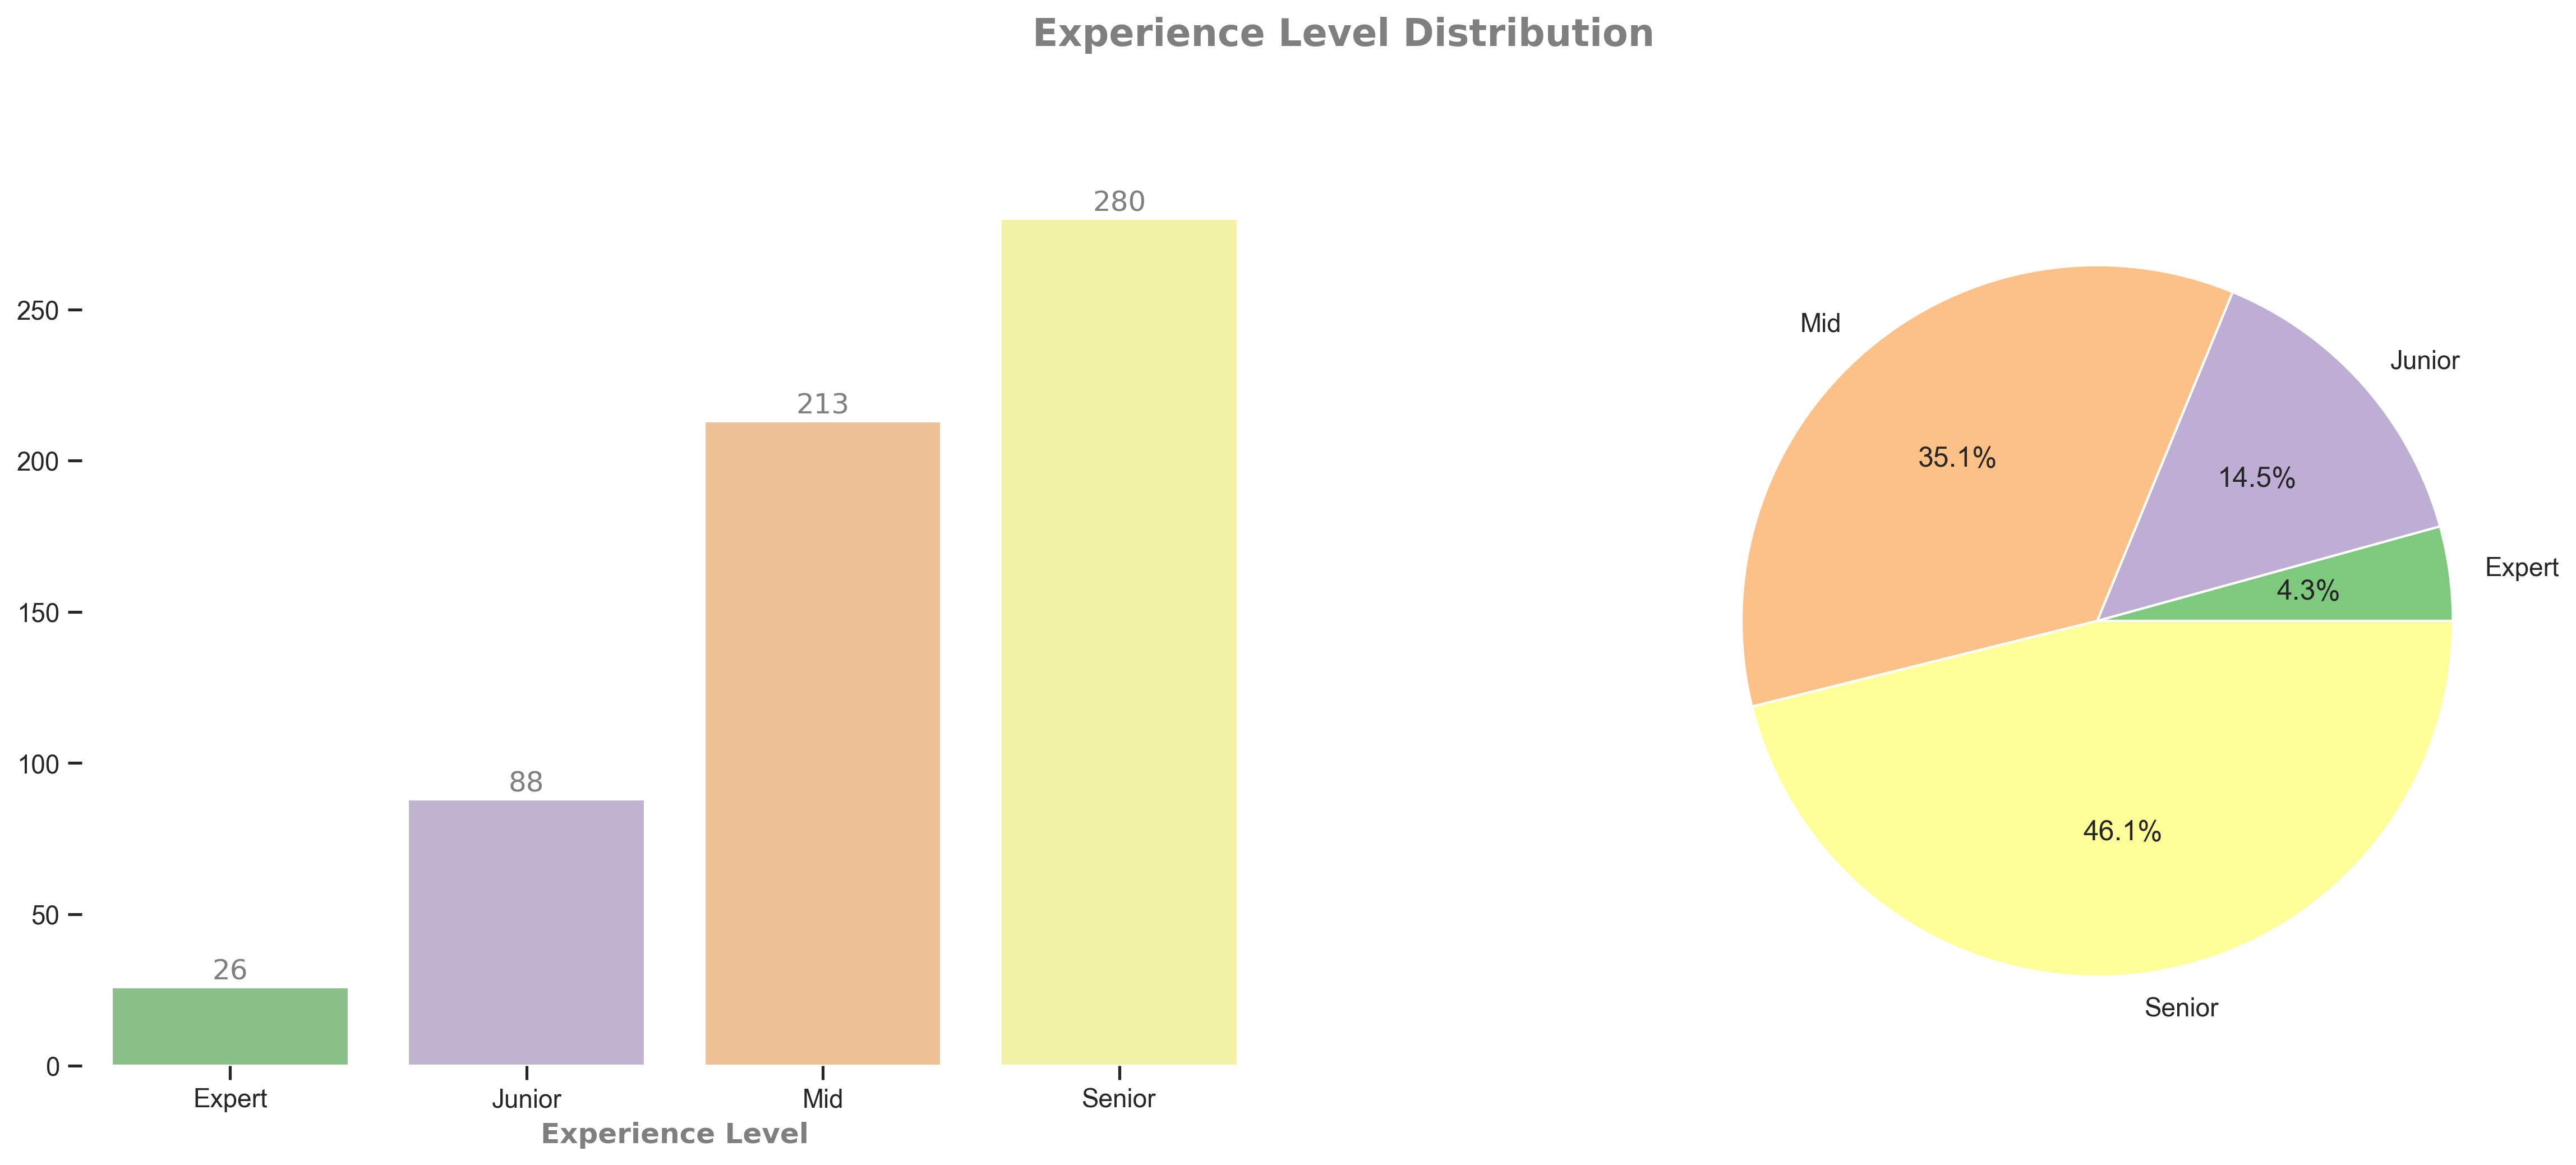

In [36]:
#Experience level
univariate_multi_plot(x="experience_level", xlabel="Experience Level")

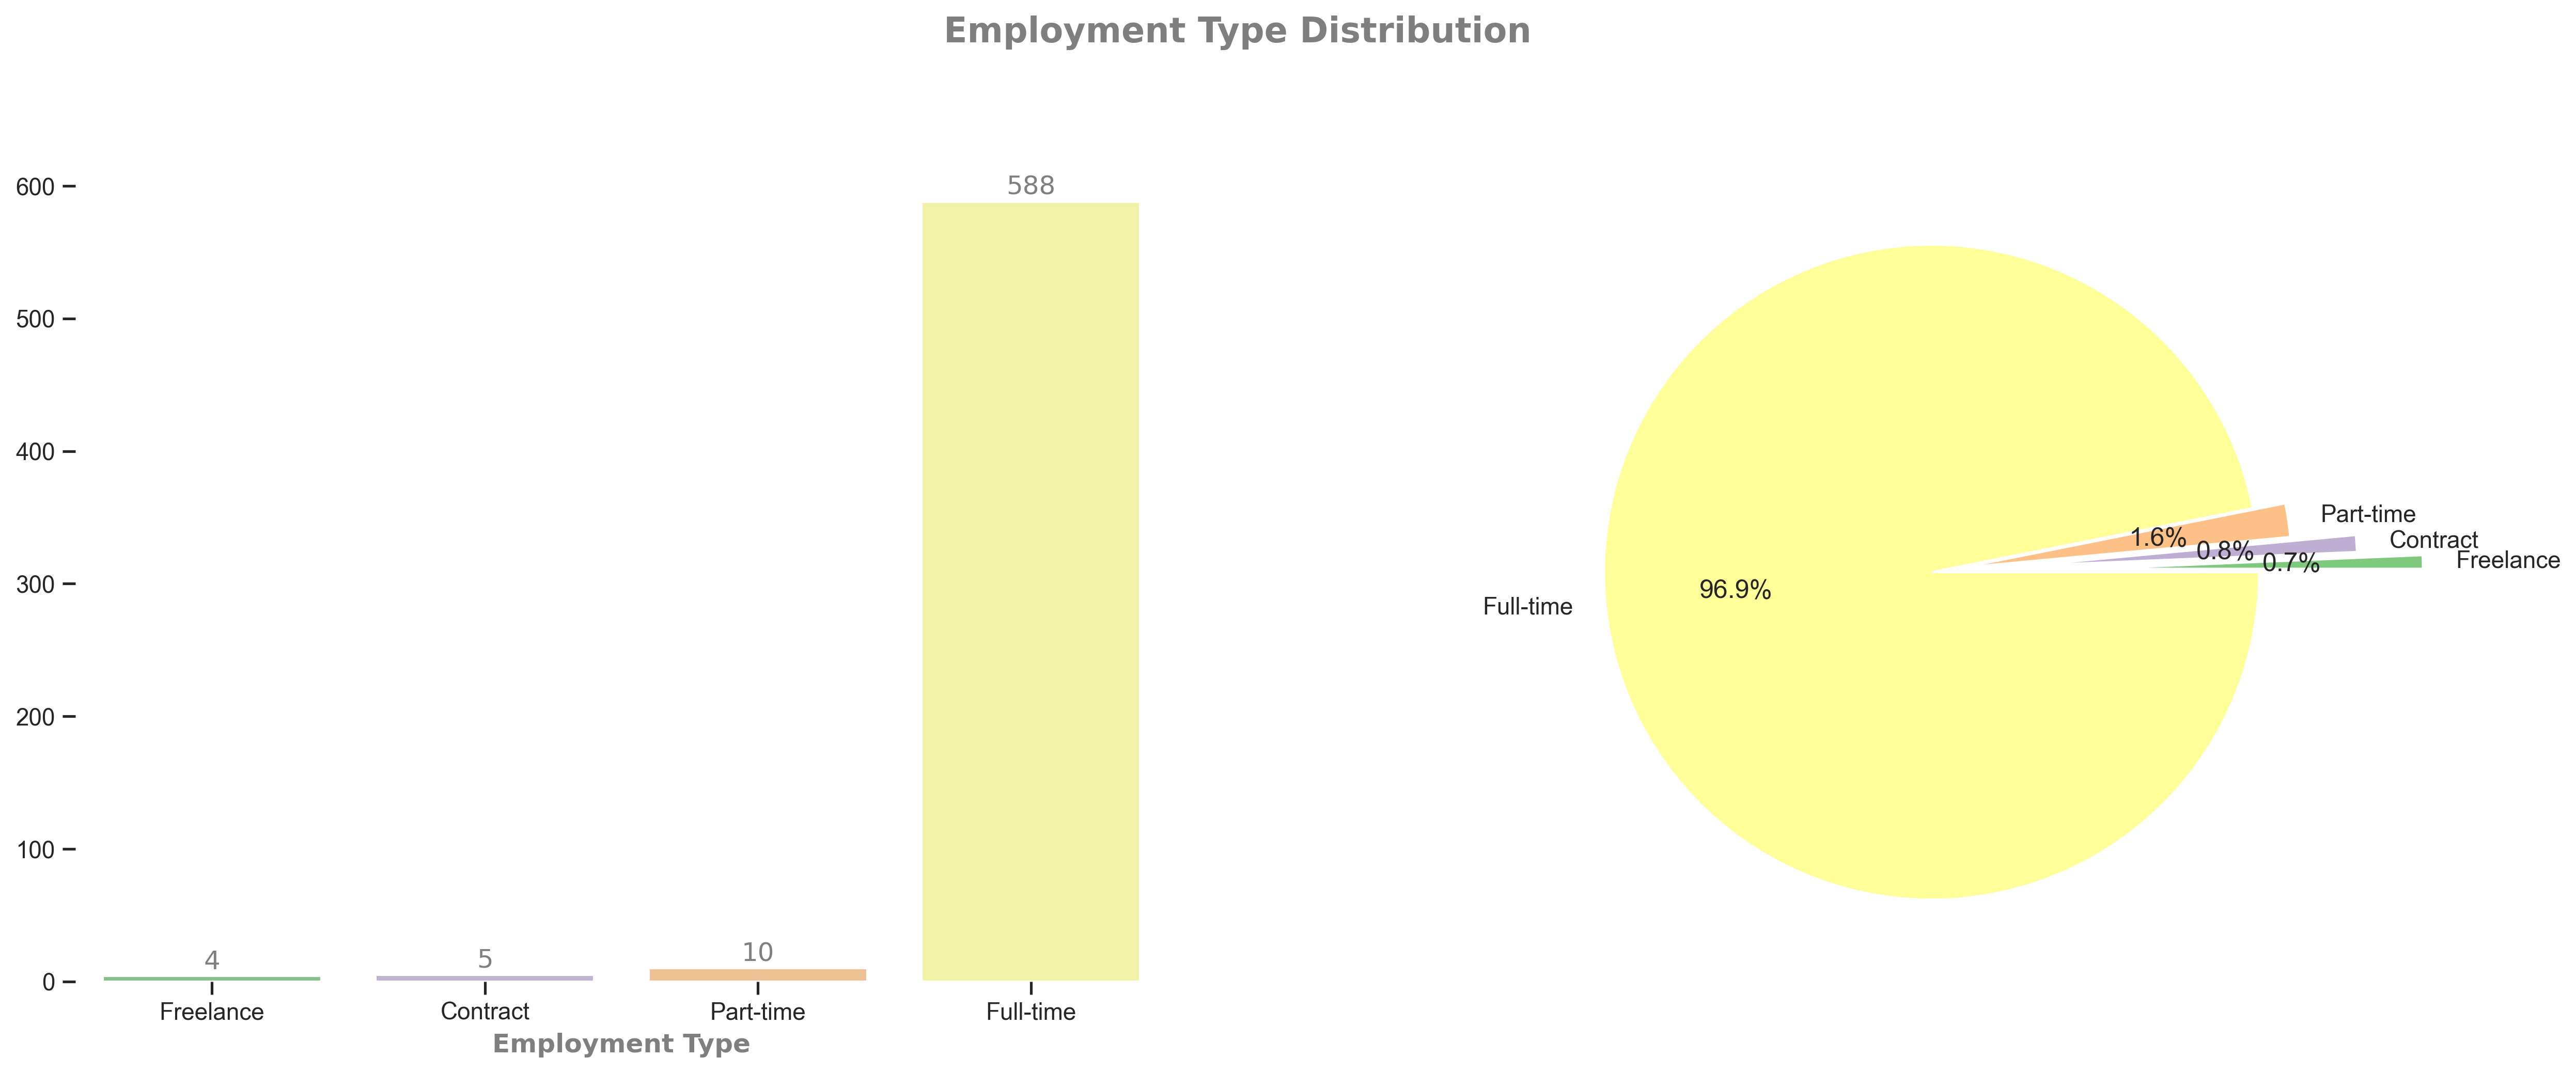

In [37]:
univariate_multi_plot(x="employment_type", xlabel="Employment Type", explode=(0.5, 0.3, 0.1, 0))

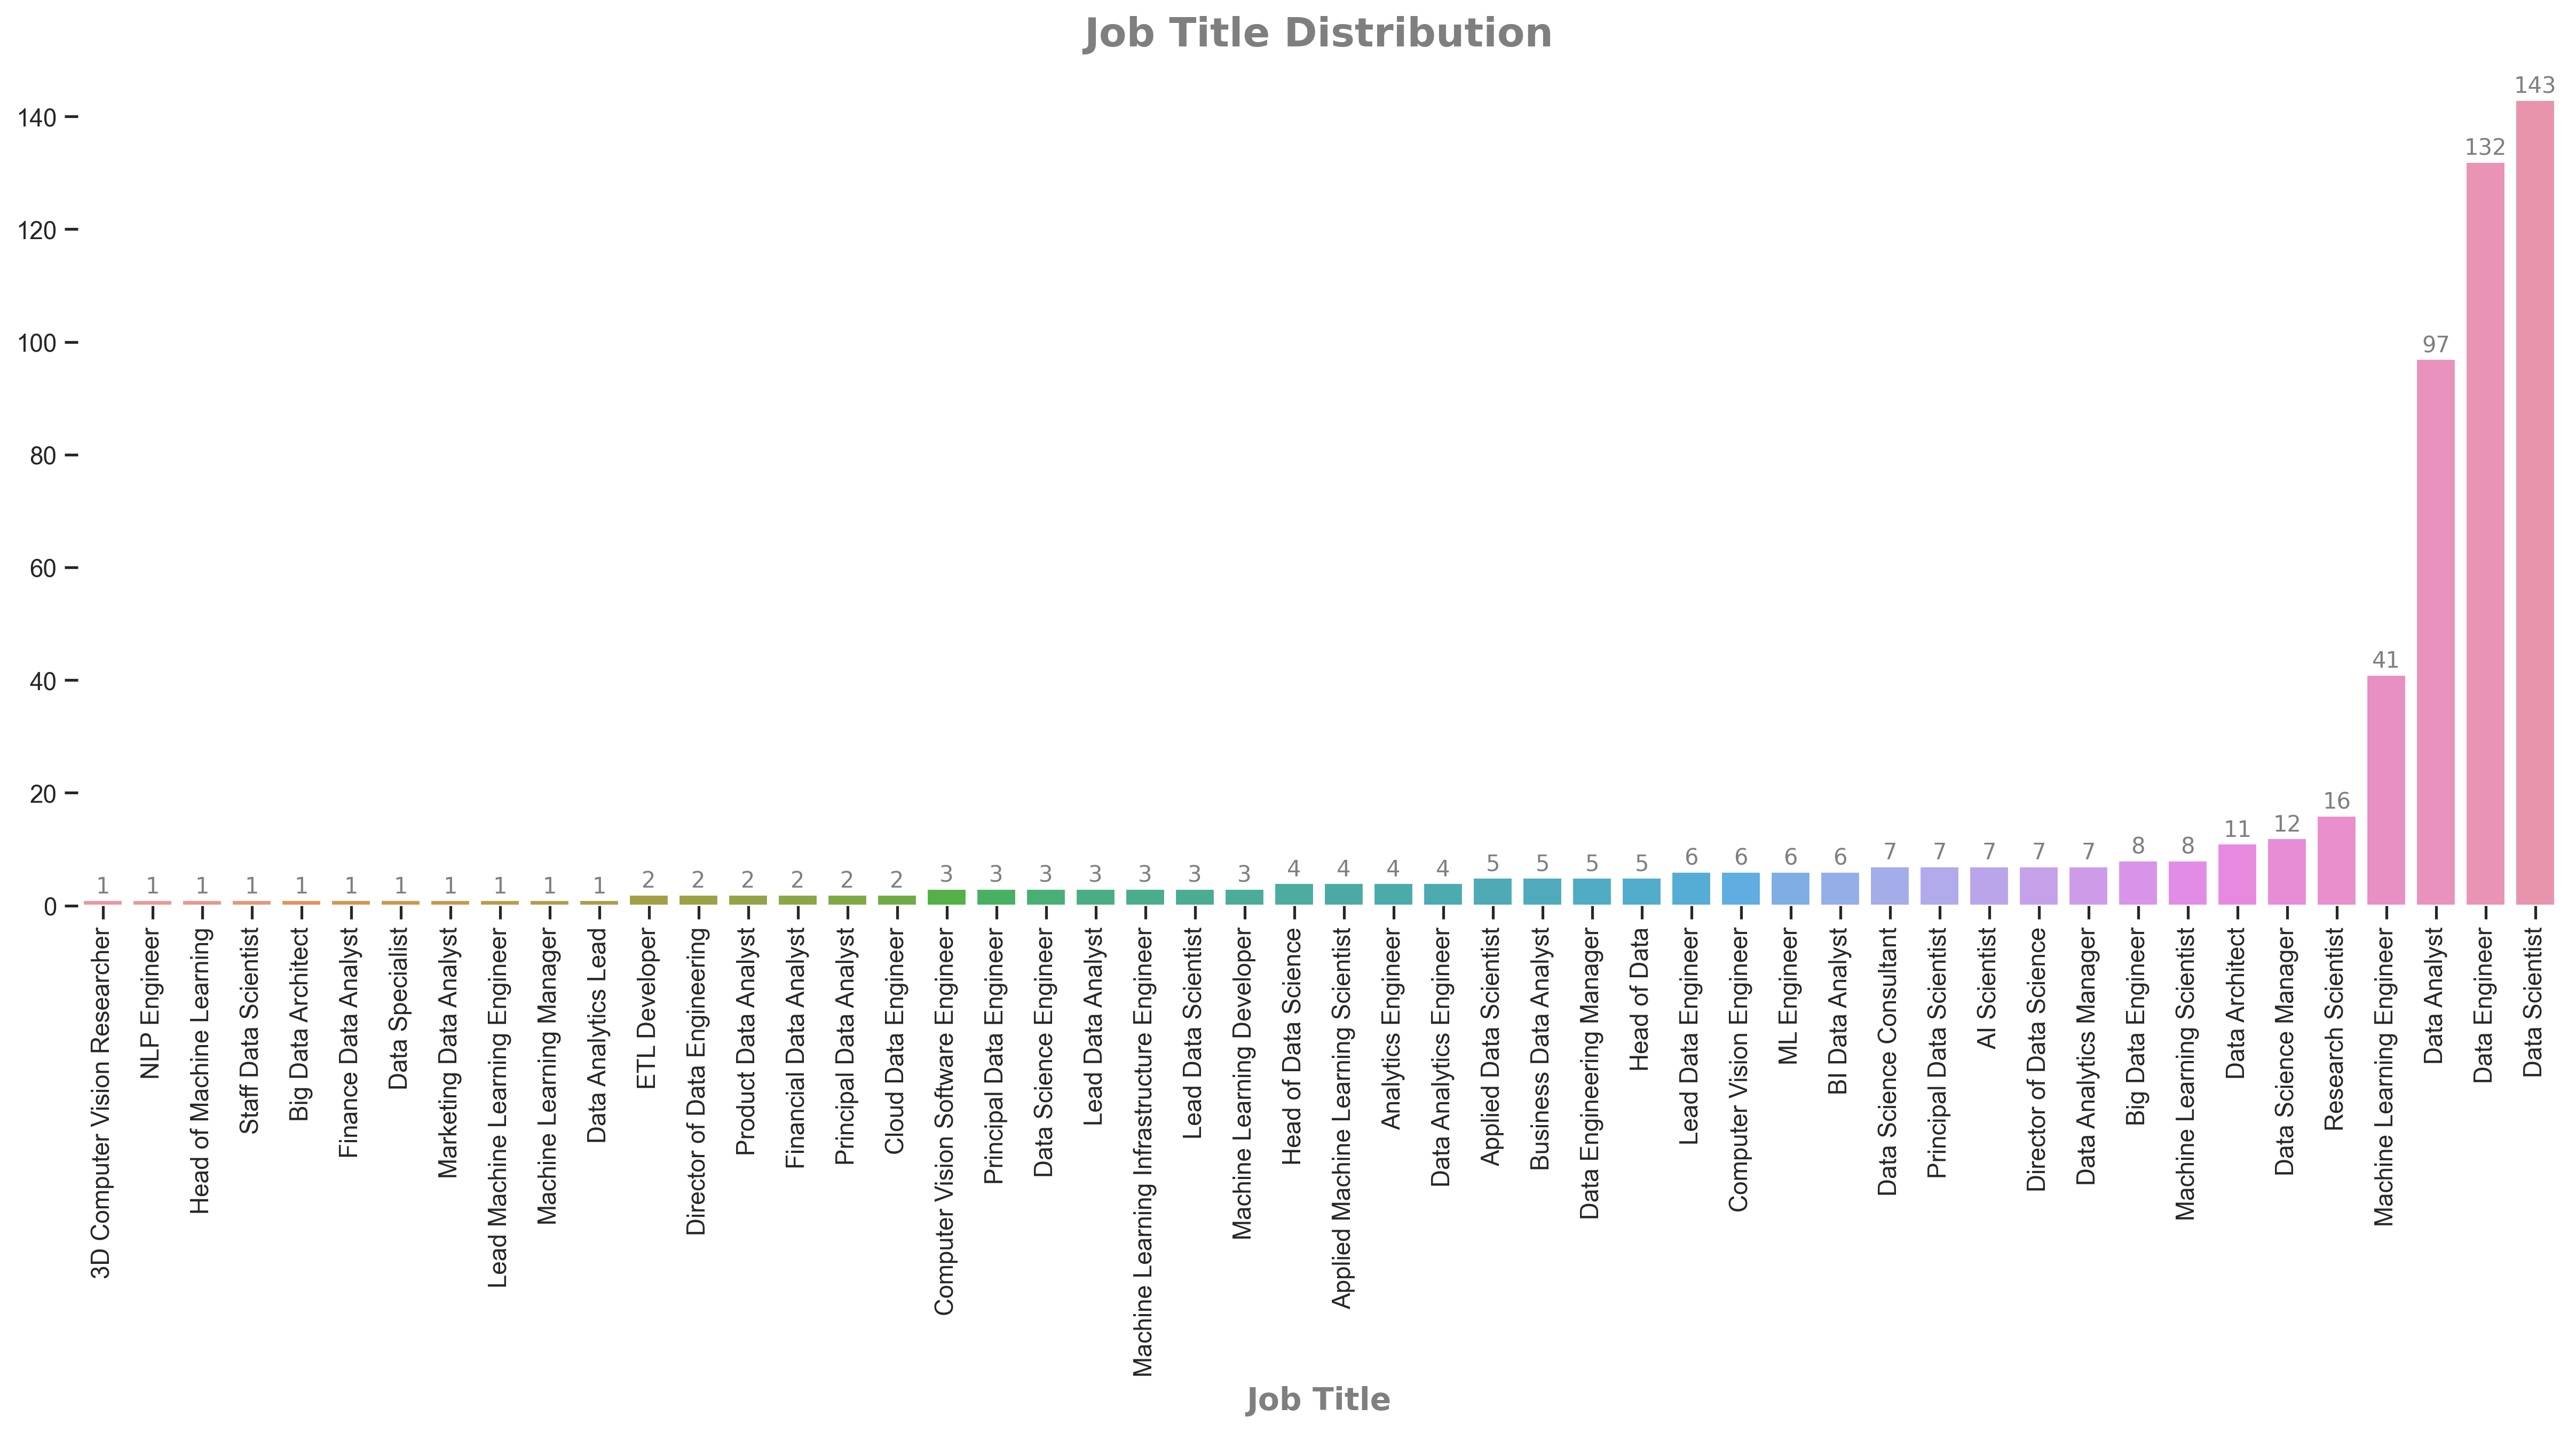

In [39]:
univariate_single_plot(x="job_title", xlabel="Job Title", rotation=90, bar_label=True)

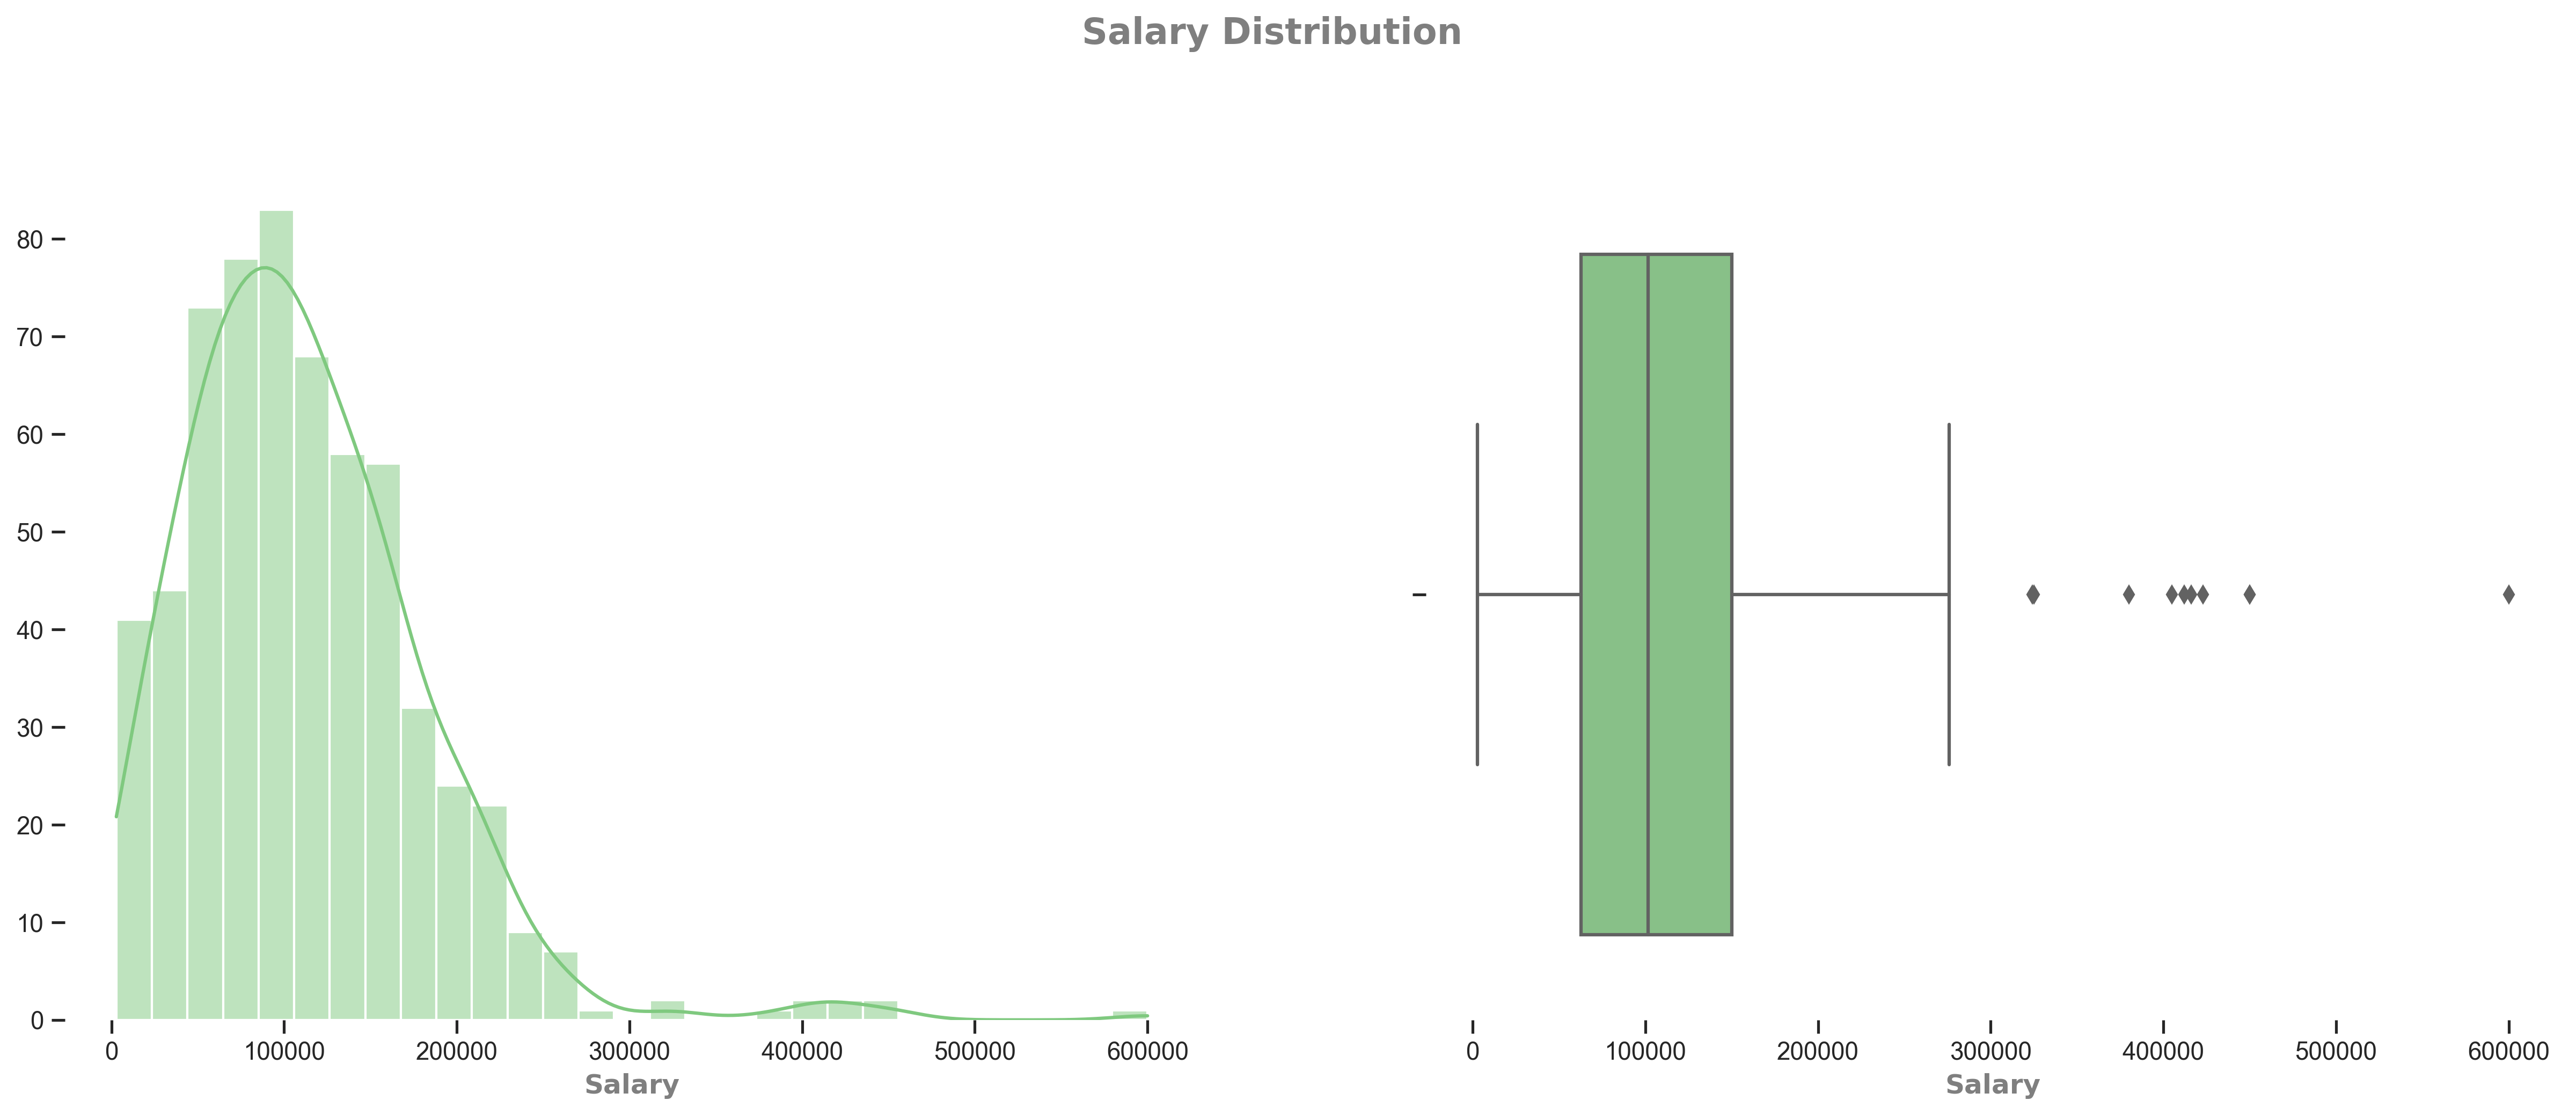

In [40]:
univariate_numerical_plot(x="salary", xlabel="Salary")

In [41]:
salaries[salaries["salary"] > 300000].sort_values("salary", ascending=False).reset_index(drop=True)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,252,2021,Expert,Full-time,Principal Data Engineer,600000,US,Remote,US,Large
1,33,2020,Mid,Full-time,Research Scientist,450000,US,On-site,US,Medium
2,97,2021,Mid,Full-time,Financial Data Analyst,450000,US,Remote,US,Large
3,157,2021,Mid,Full-time,Applied Machine Learning Scientist,423000,US,Hybrid,US,Large
4,225,2021,Expert,Contract,Principal Data Scientist,416000,US,Remote,US,Small
5,63,2020,Senior,Full-time,Data Scientist,412000,US,Remote,US,Large
6,523,2022,Senior,Full-time,Data Analytics Lead,405000,US,Remote,US,Large
7,519,2022,Senior,Full-time,Applied Data Scientist,380000,US,Remote,US,Large
8,25,2020,Expert,Full-time,Director of Data Science,325000,US,Remote,US,Large
9,482,2022,Expert,Full-time,Data Engineer,324000,US,Remote,US,Medium


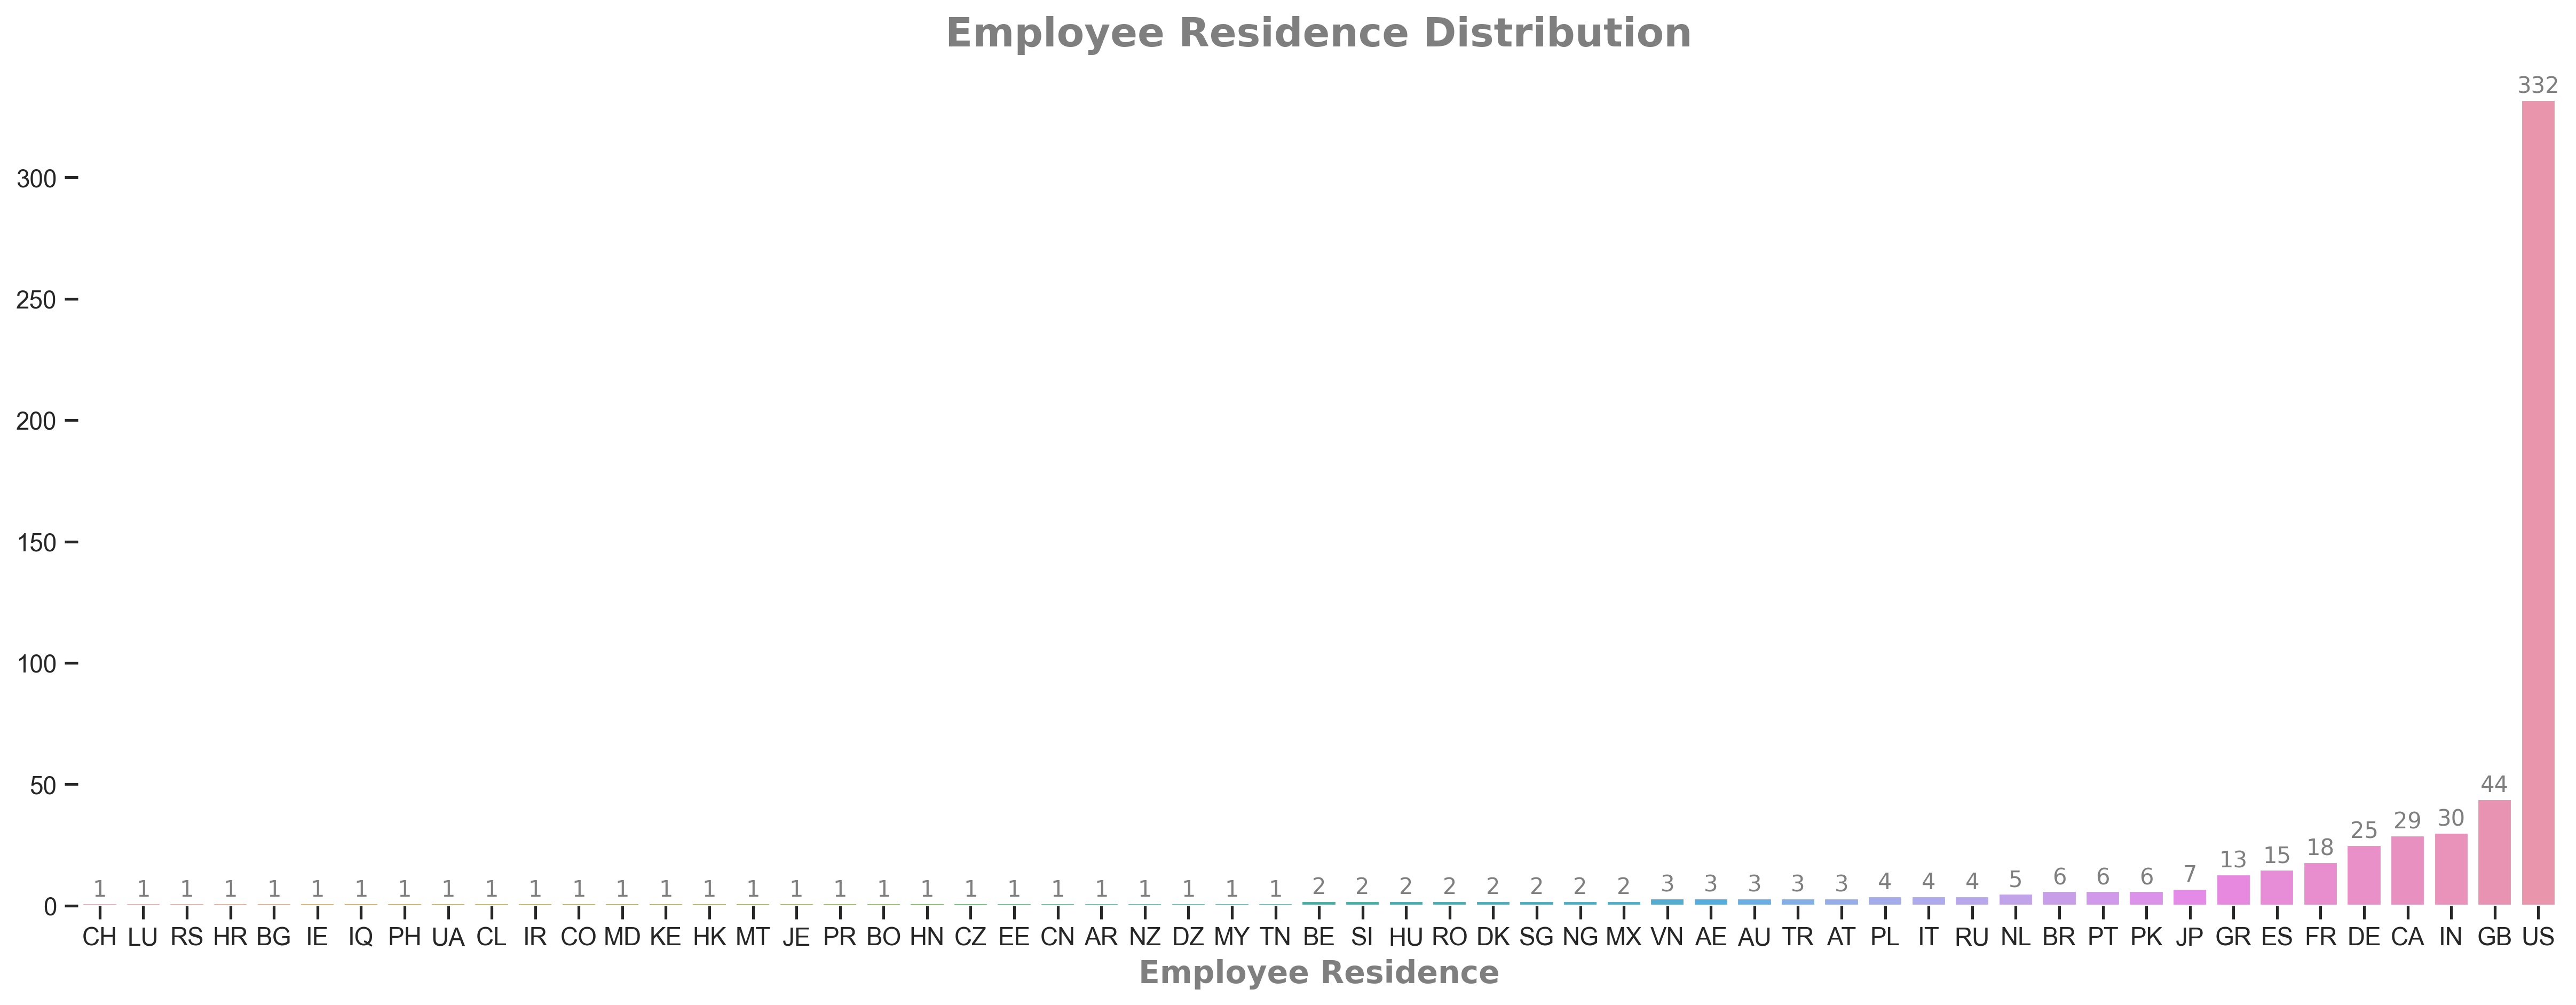

In [42]:
univariate_single_plot(x="employee_residence", xlabel="Employee Residence", bar_label=True)

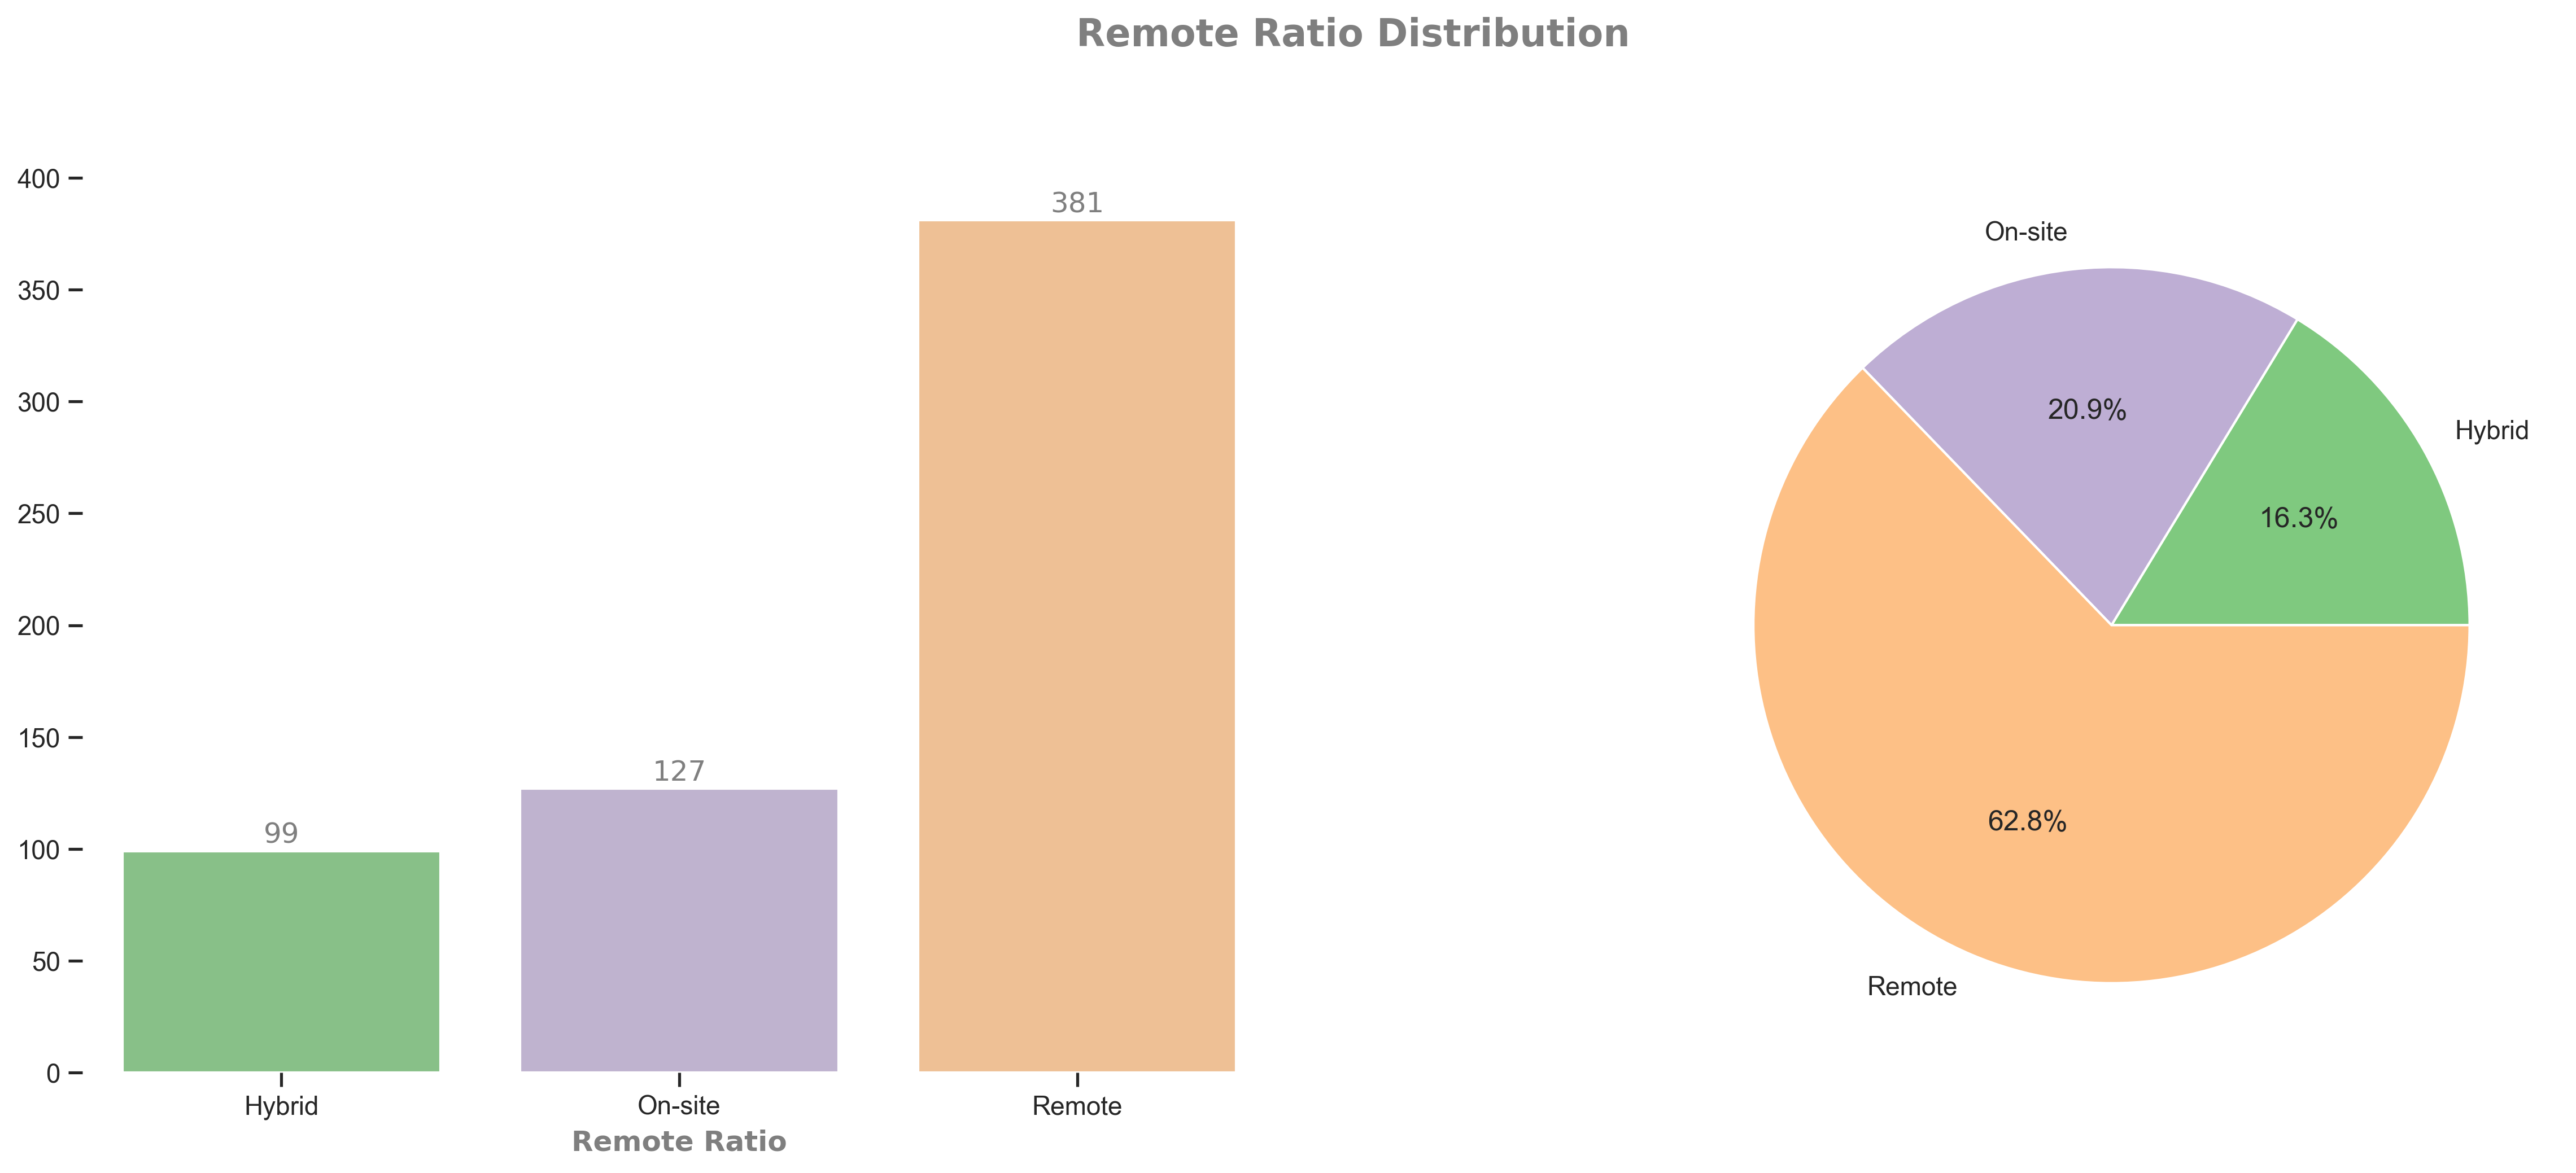

In [43]:
univariate_multi_plot(x="remote_ratio", xlabel="Remote Ratio")

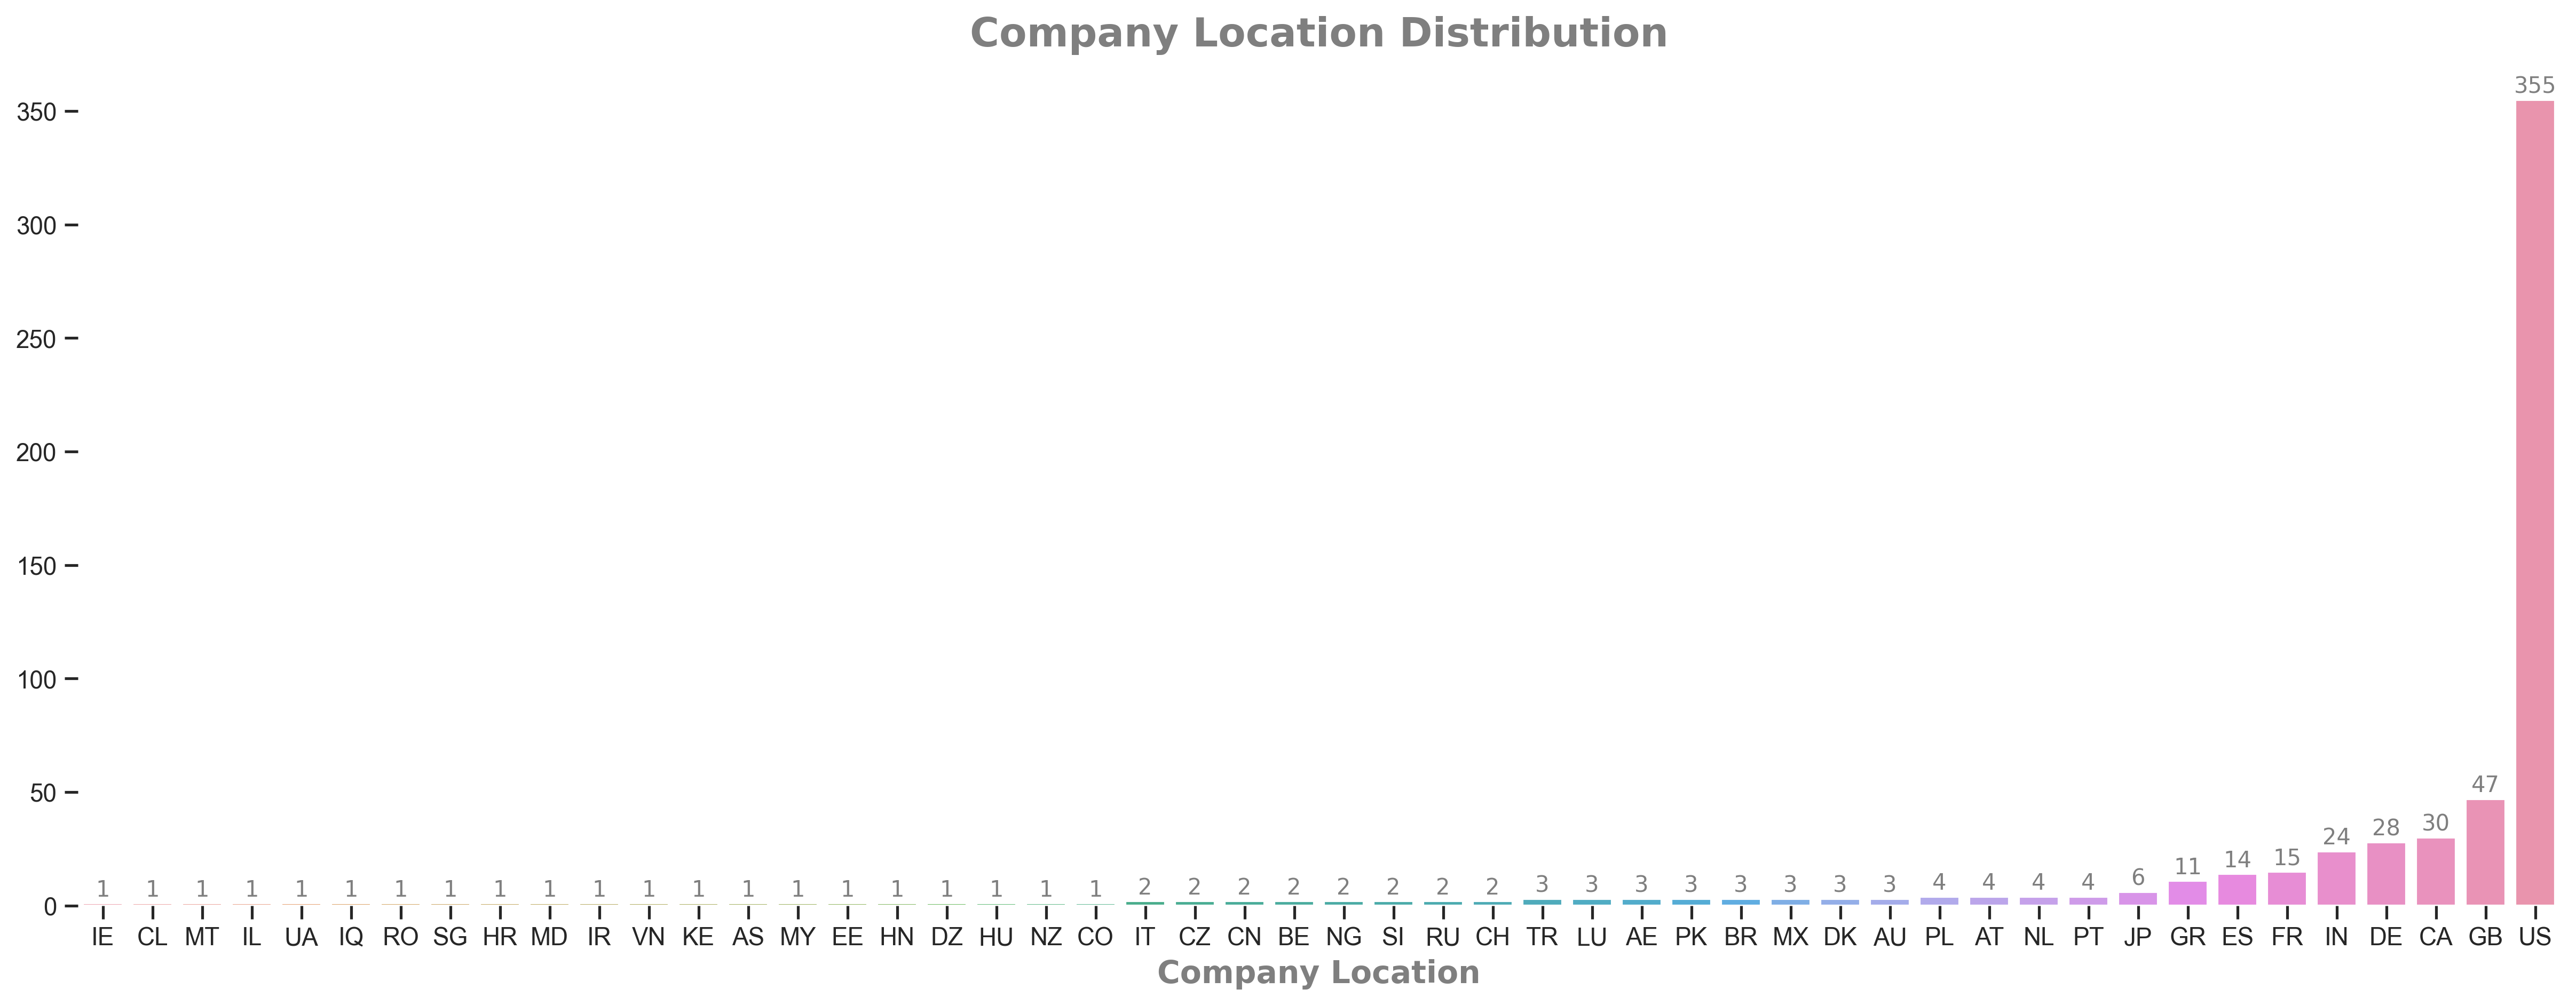

In [45]:
univariate_single_plot(x="company_location", xlabel="Company Location", bar_label=True)

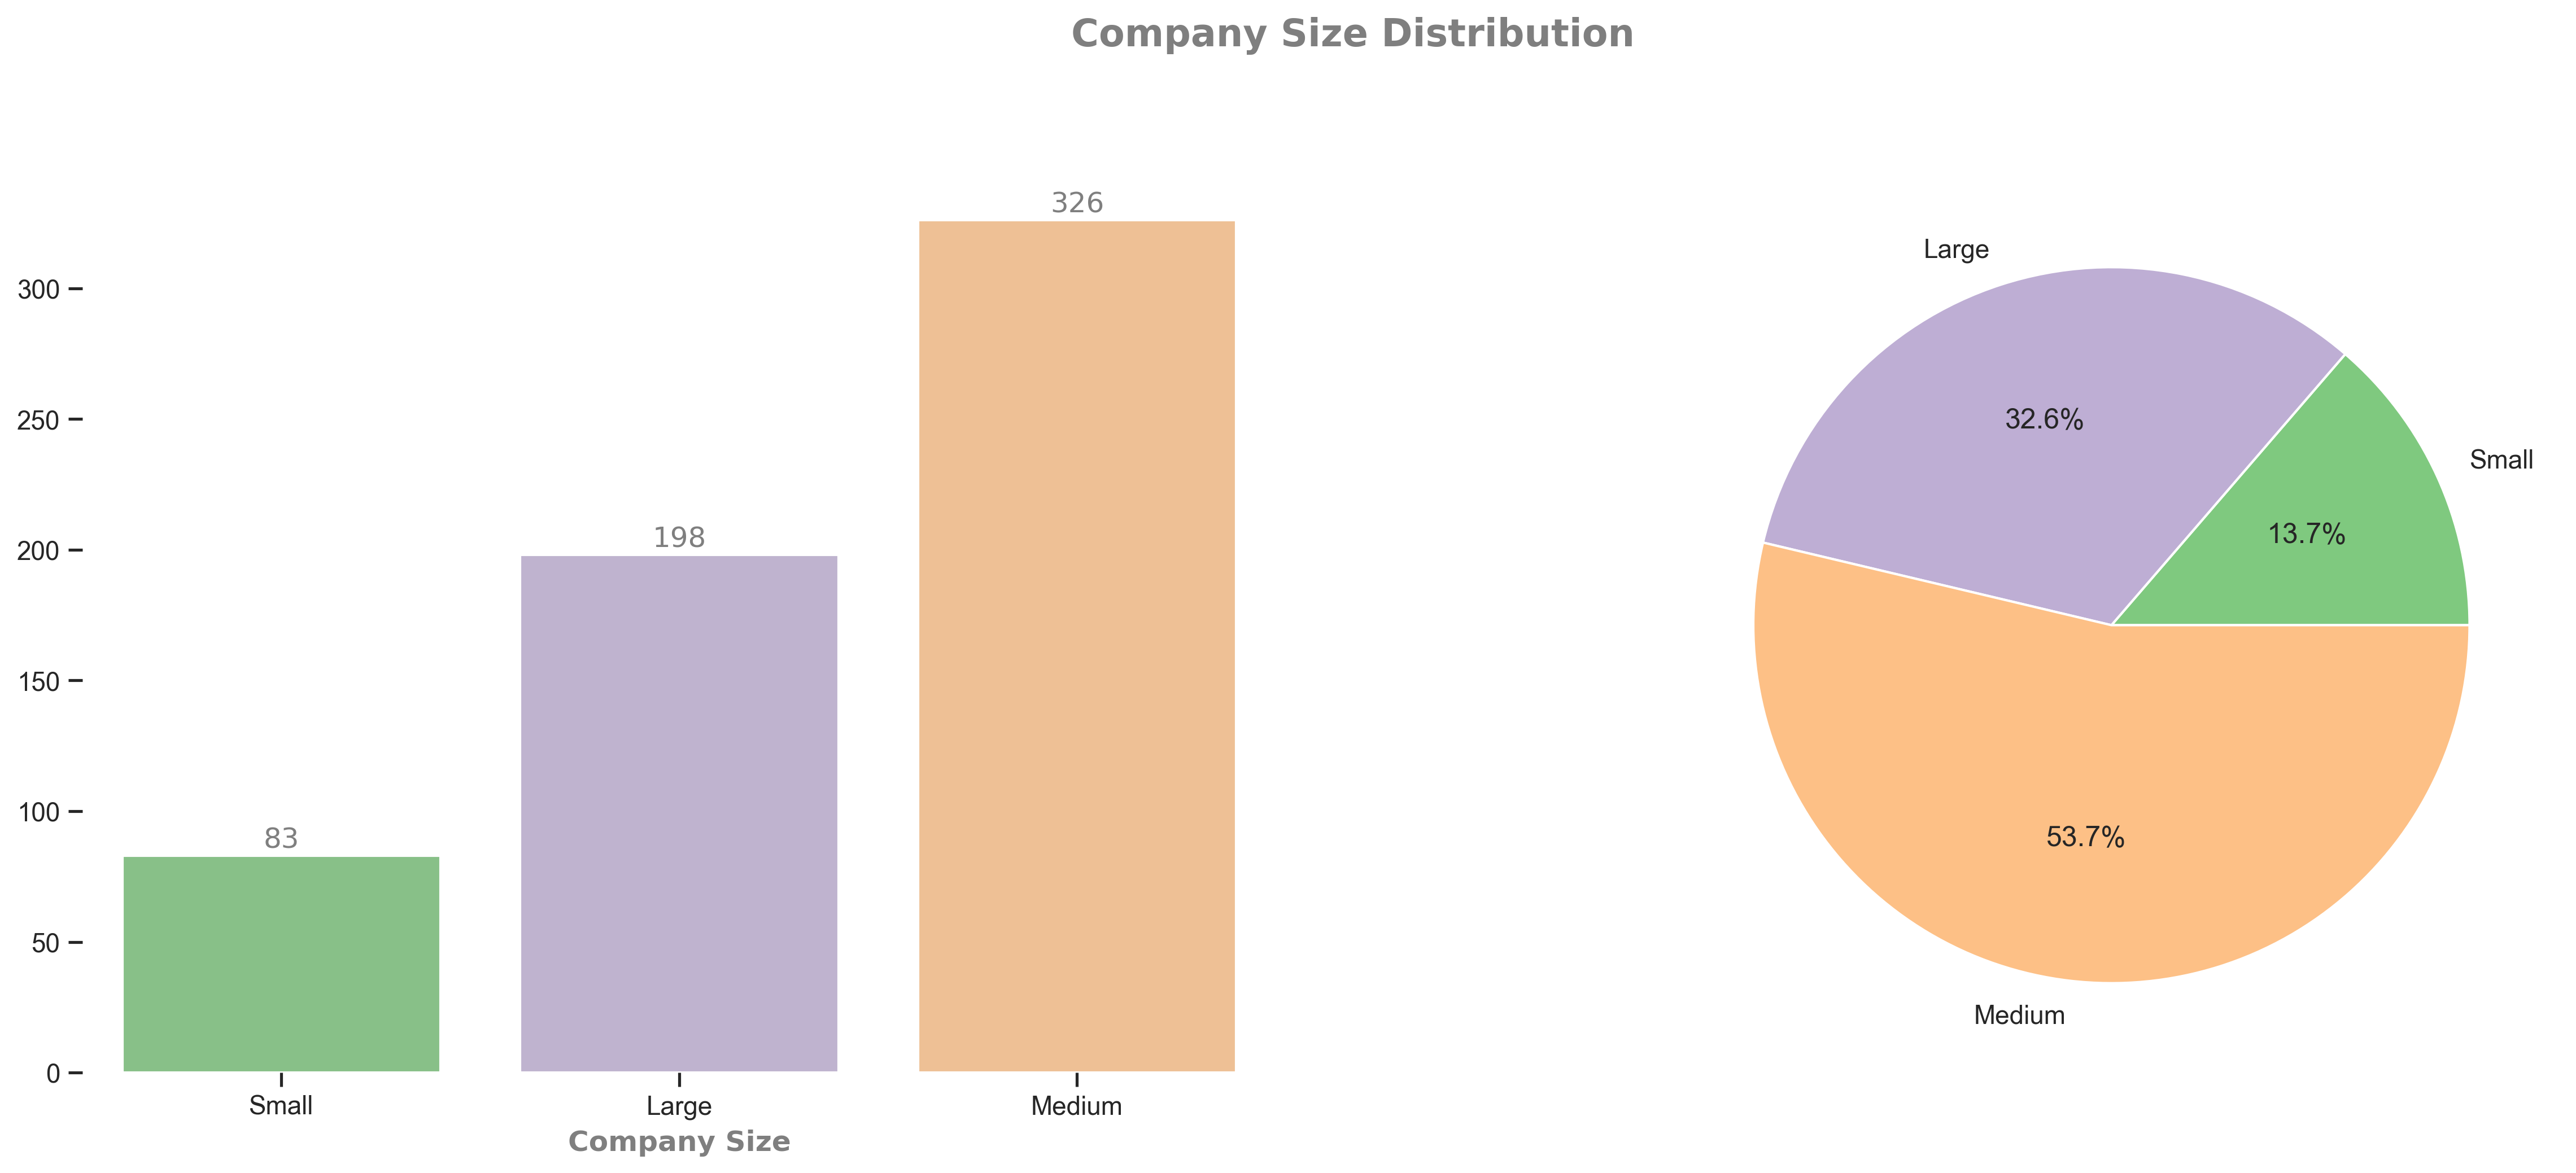

In [46]:
univariate_multi_plot(x="company_size", xlabel="Company Size")

In [47]:
def multivariate_plot(df=salaries, x=None, hue=None, xlabel=None, rotation=None, bar_label=True, 
                      legend=False, rotate_label=False):
    fig, ax = plt.subplots(1, 1, figsize=(20, 7))
    df = df.groupby(x).mean()["salary"].sort_values().reset_index().copy()
    sns.barplot(data=df, x=x, y="salary", hue=hue, ci=None)
    plt.ylabel(ylabel="Salary (in USD)", size=12, fontdict=FIG_FONT)
    plt.xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    plt.title(label=f'Salaries by {xlabel}', size=16, fontdict=FIG_FONT)
    plt.xticks(rotation=rotation)
    if legend:
        plt.legend()
    if bar_label and rotate_label:
        ax.bar_label(ax.containers[0], label_type='edge', size=10, padding=3, fontname="Helvetica, Ariel", 
                    color="#7f7f7f", rotation="vertical")
    elif bar_label and not rotate_label:
        ax.bar_label(ax.containers[0], label_type='edge', size=12, padding=1, fontname="Helvetica, Ariel", 
                    color="#7f7f7f")
    sns.despine(bottom=True, left=True)
    plt.show()
    
    
def multivariate_count_plot(df=salaries, x=None, hue=None, xlabel=None, hue_label=None, rotation=None, 
                            legend=False, bar_label=False, convert=False):
    fig ,ax = plt.subplots(1, 1, figsize=(20, 7))
    sns.countplot(data=df, x=x, hue=hue)
    plt.ylabel(ylabel="", size=12, fontdict=FIG_FONT)
    plt.xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    plt.title(label=f'{hue_label} vs. {xlabel}', size=16, fontdict=FIG_FONT)
    plt.xticks(rotation=rotation)
    if bar_label:
        for i in range(df[hue].nunique()):
            ax.bar_label(ax.containers[i], label_type='edge', size=10, padding=1, fontname="Helvetica, Ariel", 
                    color="#7f7f7f")
    if legend:
        if convert:
            country_labels = coco.CountryConverter().convert(df[hue].unique(), to='name_short')
            plt.legend(title=hue_label, labels=country_labels)
        else:
            plt.legend(title=hue_label)
    sns.despine(bottom=True, left=True)
    plt.show()    

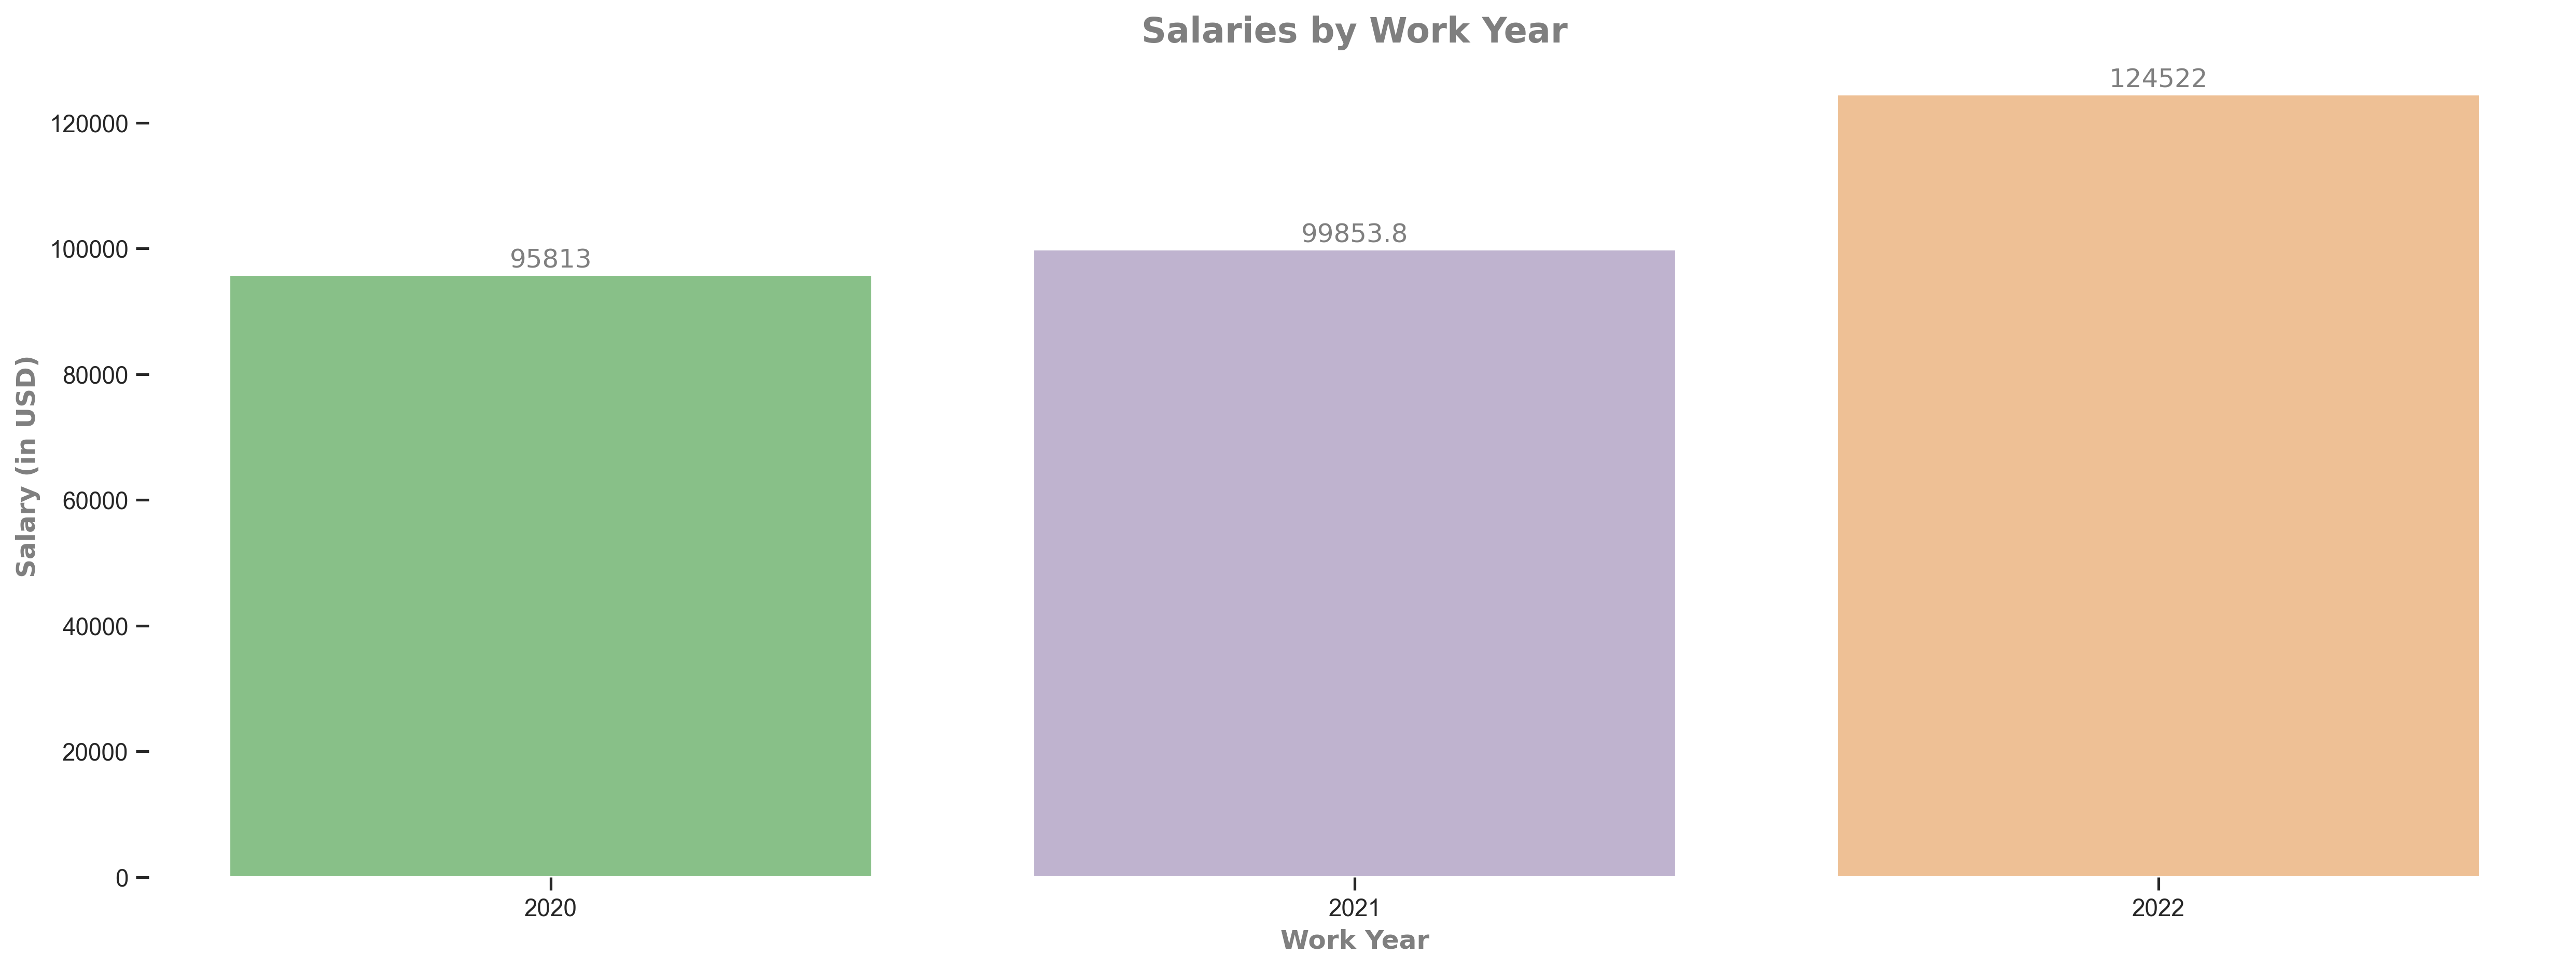

In [48]:
# work year salary
multivariate_plot(x="work_year", xlabel="Work Year")

In [49]:
diff_2022 = salaries.groupby("work_year")["salary"].mean().loc[2022] - salaries.groupby("work_year")["salary"].mean().loc[2021]
diff_2022_in_percentage = diff_2022 / salaries.groupby("work_year")["salary"].mean().loc[2021] * 100 
print(f'2021-2022 average salary increase: {diff_2022_in_percentage:.2f}%')

2021-2022 average salary increase: 24.70%


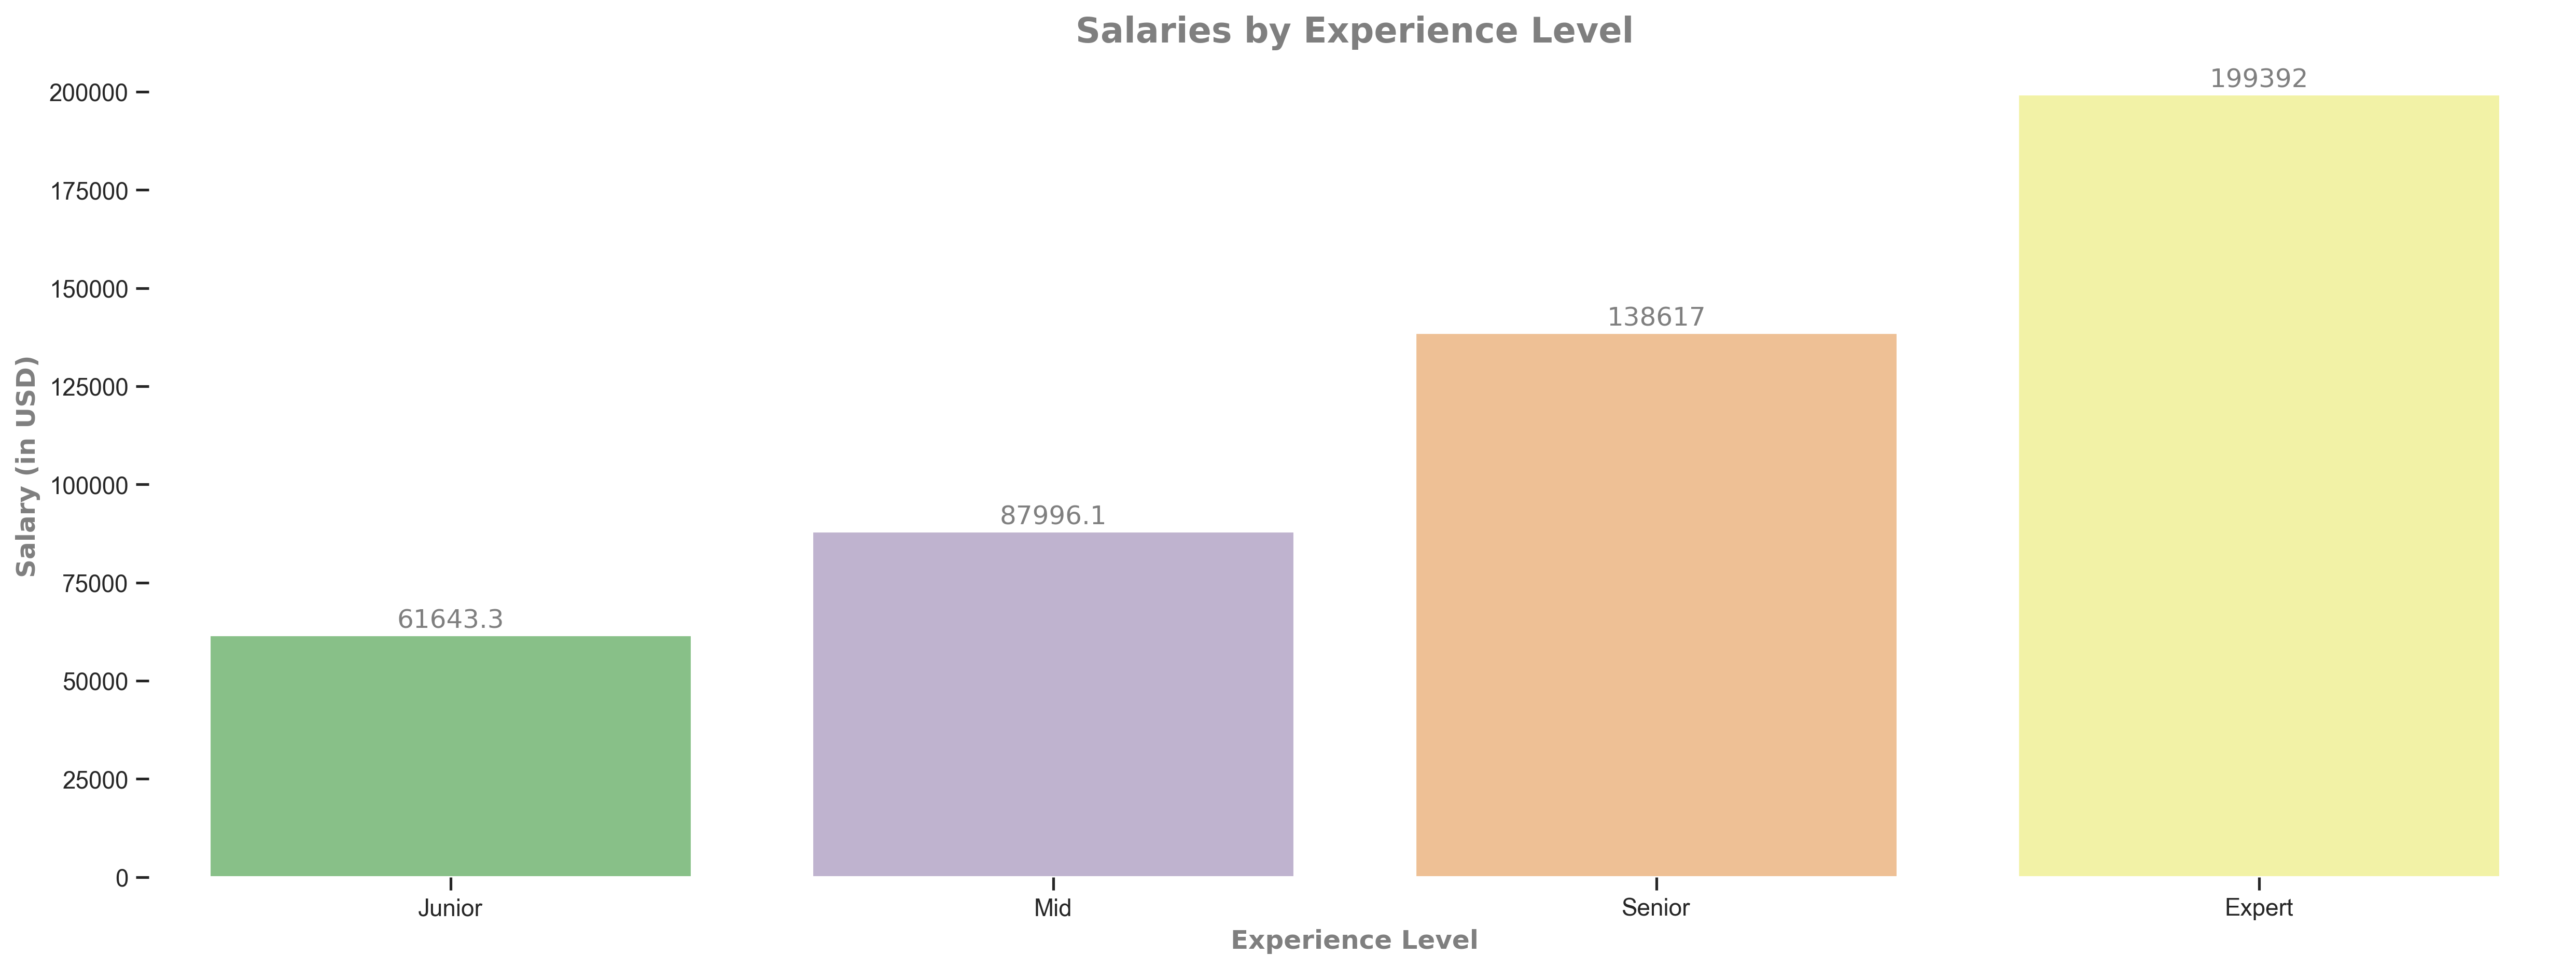

In [50]:
#Experience level and salary
multivariate_plot(x="experience_level", xlabel="Experience Level")

In [51]:
salaries_by_exp = salaries.groupby("experience_level")["salary"].mean()
ex_se_diff = (salaries_by_exp.loc["Expert"] - salaries_by_exp.loc["Senior"]) 
se_mi_diff = (salaries_by_exp.loc["Senior"] - salaries_by_exp.loc["Mid"]) 
mi_en_diff = (salaries_by_exp.loc["Mid"] - salaries_by_exp.loc["Junior"]) 
print(f'Expert-Senior Difference: {int(ex_se_diff)} USD ({ex_se_diff / salaries_by_exp.loc["Senior"] * 100:.2f}%)')
print(f'Senior-Mid Difference: {int(se_mi_diff)} USD ({se_mi_diff / salaries_by_exp.loc["Mid"] * 100:.2f}%)')
print(f'Mid-Junior Difference: {int(mi_en_diff)} USD ({mi_en_diff / salaries_by_exp.loc["Junior"] * 100:.2f}%)')

Expert-Senior Difference: 60774 USD (43.84%)
Senior-Mid Difference: 50621 USD (57.53%)
Mid-Junior Difference: 26352 USD (42.75%)


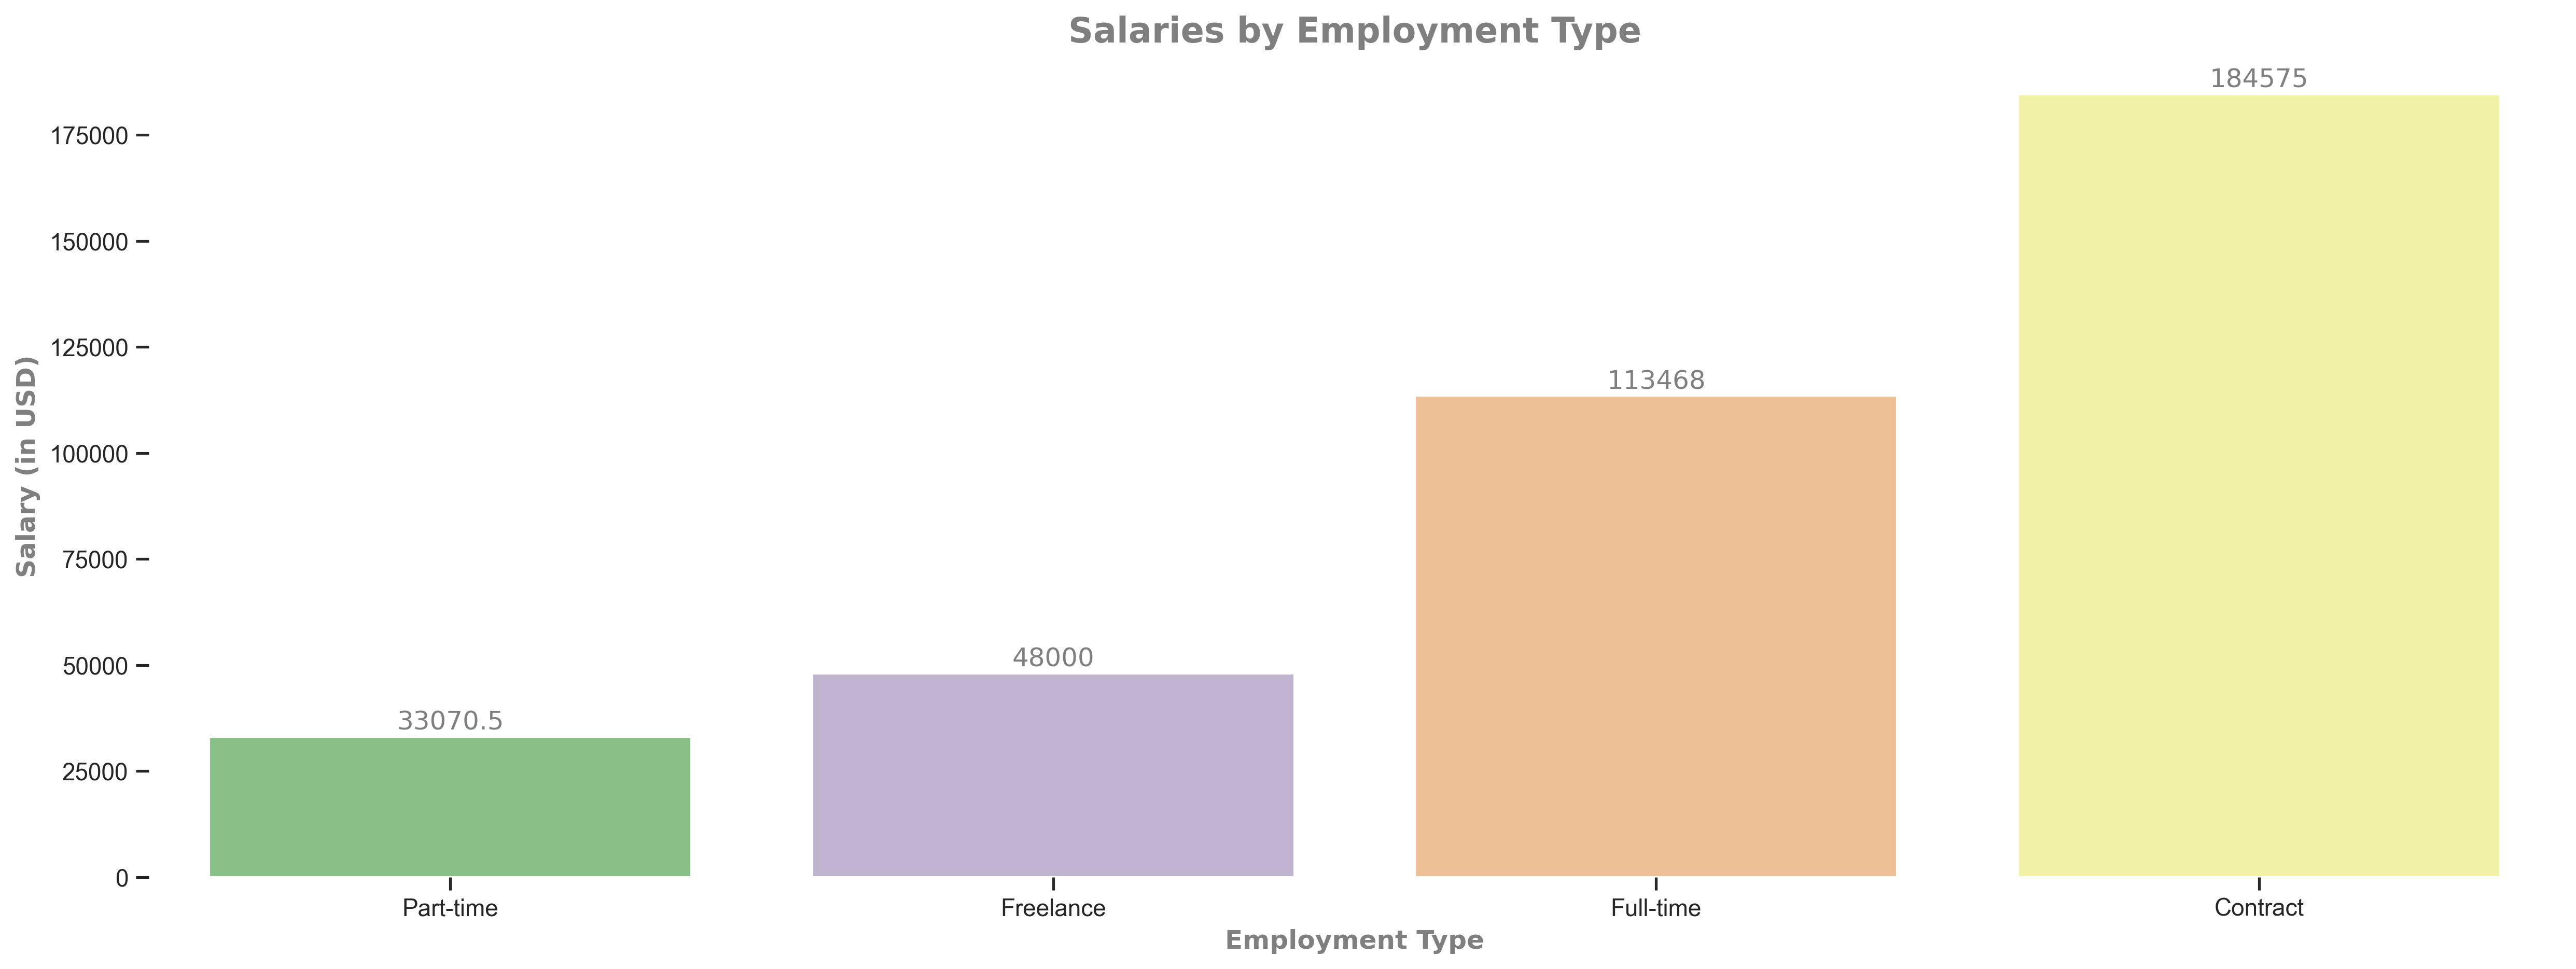

In [52]:
#Employment type and salary
multivariate_plot(x='employment_type', xlabel="Employment Type")

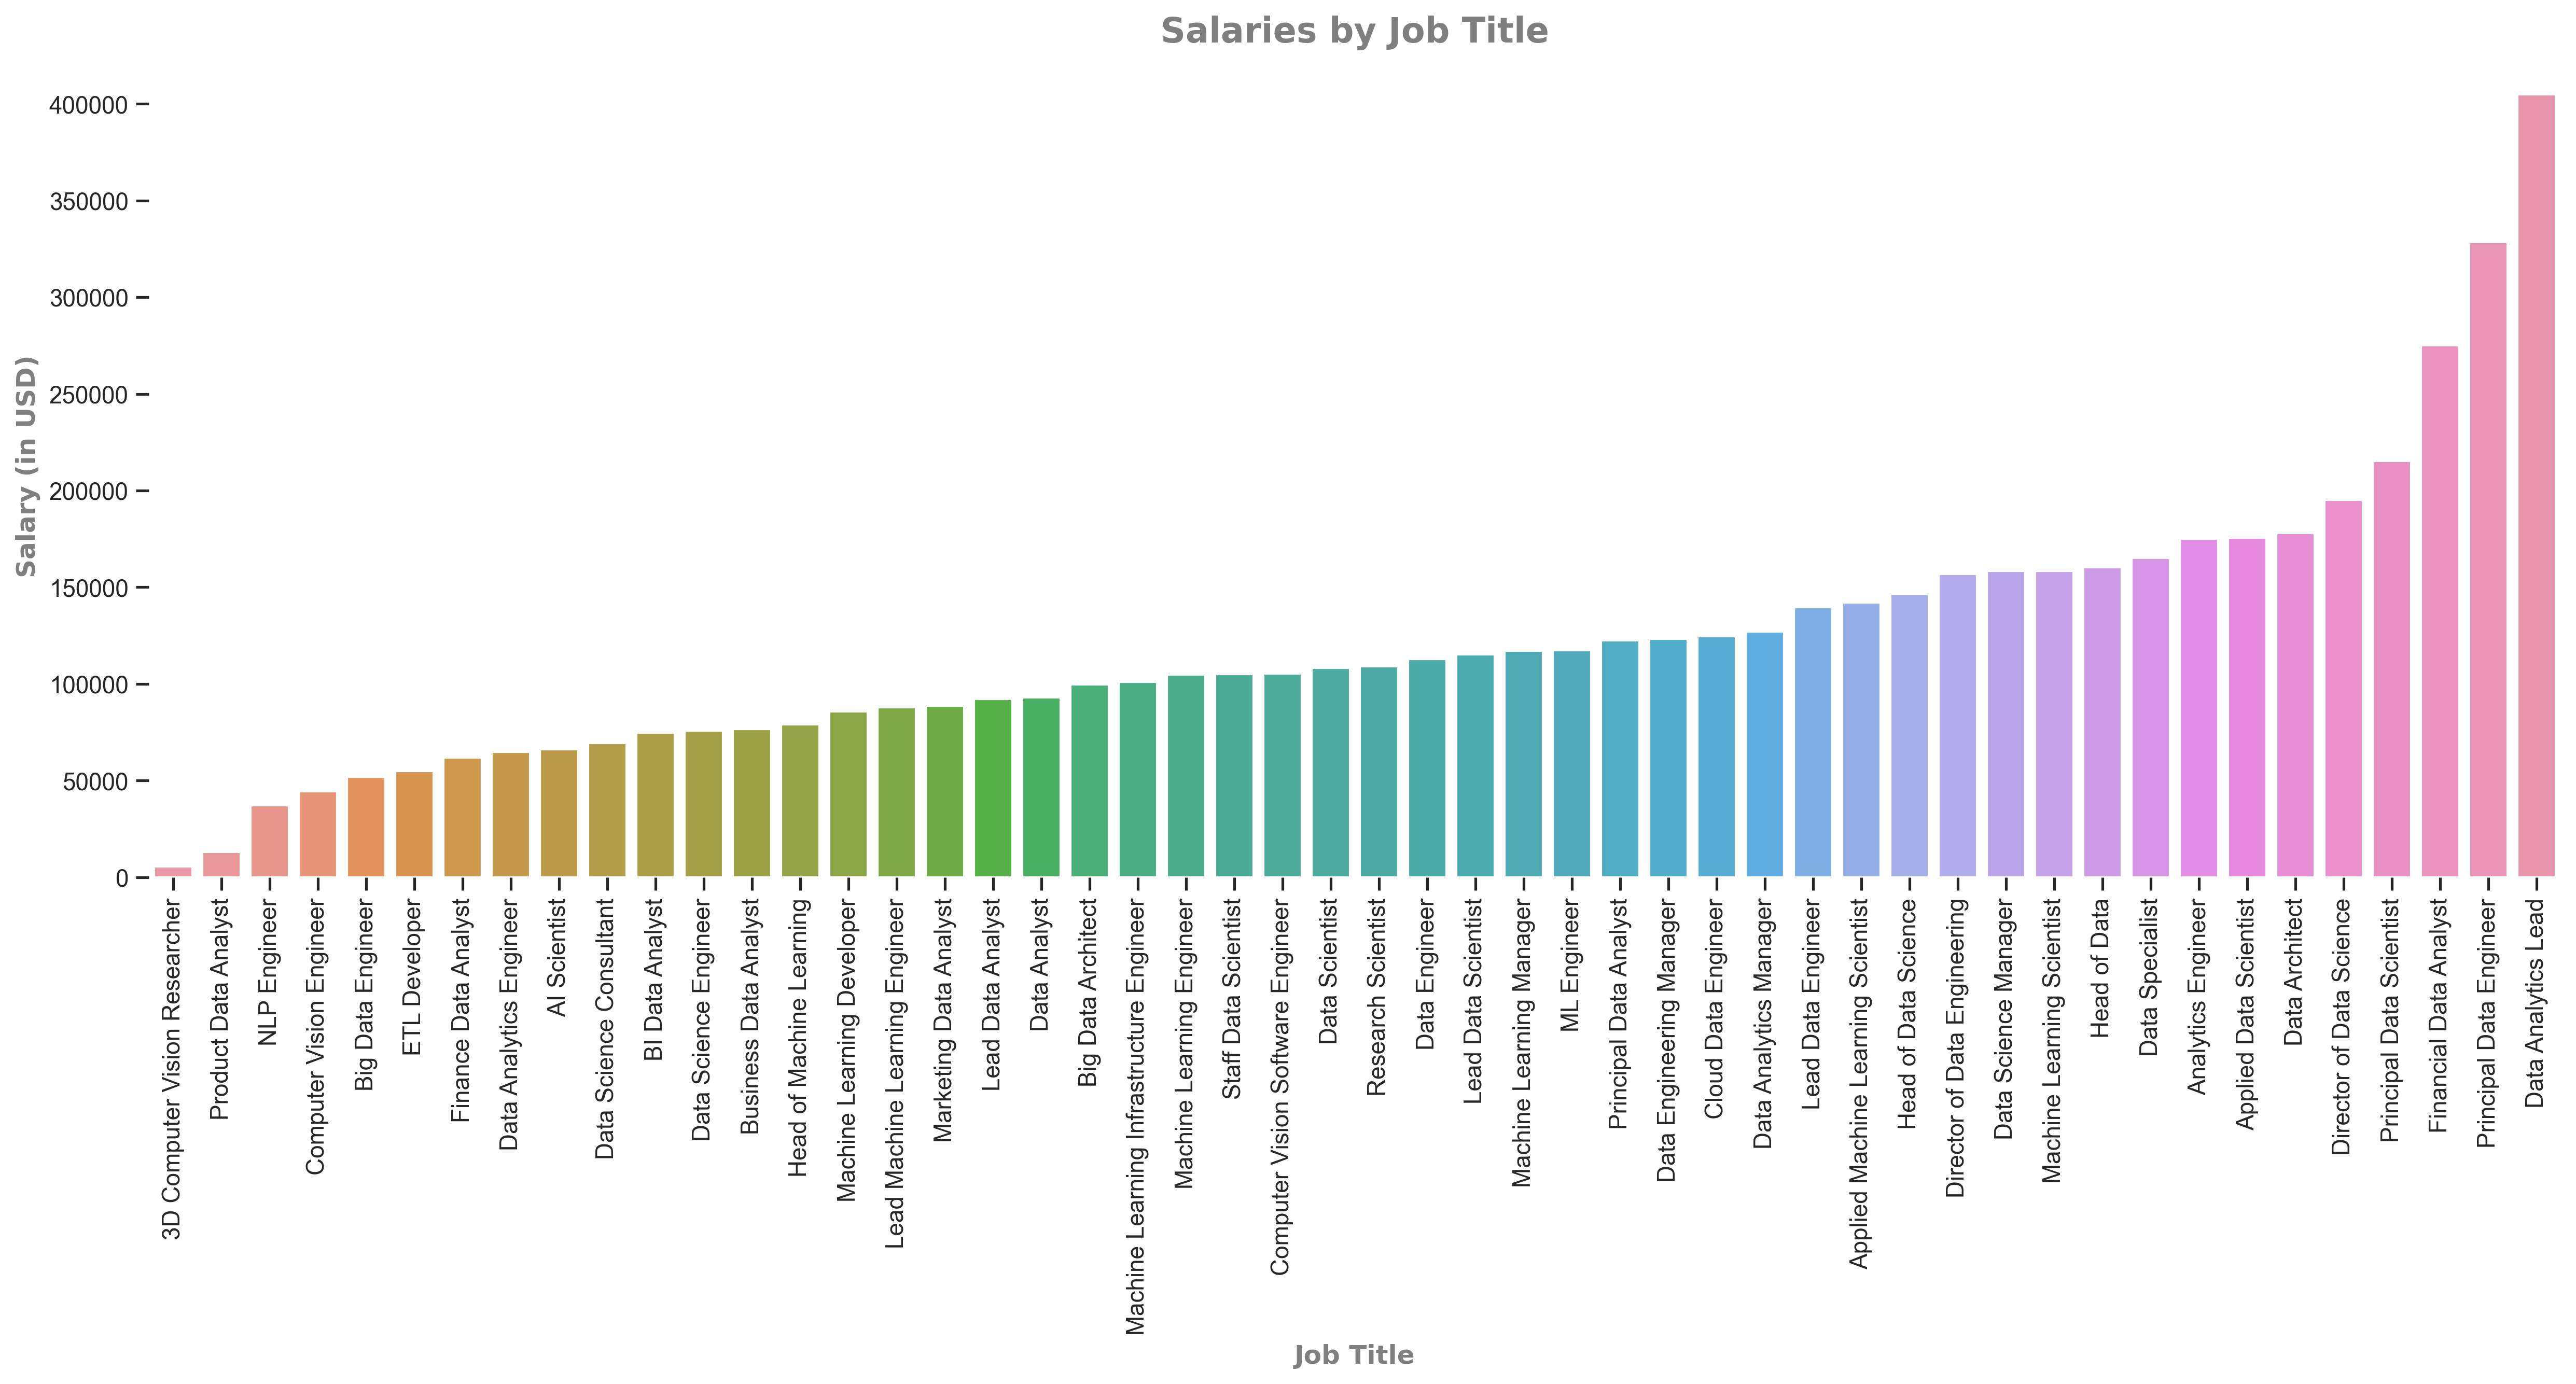

In [53]:
# Job title and salary
multivariate_plot(x="job_title", xlabel="Job Title", rotation=90, bar_label=False)

In [54]:
single_entries = pd.DataFrame(data=salaries["job_title"].value_counts(ascending=True).head(10))
single_entries.columns = ["Number of Salary Data"]
single_entries.index.names = ["Job Title"]
single_entries

,Number of Salary Data
Job Title,
3D Computer Vision Researcher,1
NLP Engineer,1
Head of Machine Learning,1
Staff Data Scientist,1
Big Data Architect,1
Finance Data Analyst,1
Data Specialist,1
Marketing Data Analyst,1
Lead Machine Learning Engineer,1
